**Linear Regression Automobile Consulting Company**

This capstone project as part of the Data Science course.

**Problem Statement:**

1. A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to compete with their US and European counterparts.

2. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market since those may be very different from the Chinese market. The company wants to know:
 
3. Which variables are significant in predicting the price of a car How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.


**Business Goal**

You must model the price of cars with the available independent variables. The management will use it to understand how the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy, etc., to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

Reading, understanding the data

1. Data Cleaning and EDA
2. Preparing the data for modeling (train test split, recalling, etc.)
3. Training the model
4. Residual analysis

Predictions and evaluation on the test set

**Reading and Understanding the Data**

In [1]:
# Import Libraries 

import pandas as pd
import numpy as np


# Import Libraries for Data visualizations
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D
%matplotlib inline

# Import Libraries for Data Model
import statsmodels.api as sm 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Will create the separator for better data visualization among each variable
def Line_Separator():
    print('*'*50, '\n')
    
def Line_Separator1():
    print('*'*100, '\n')

In [4]:
# Bold fonts for key highlights
class datastyle:
   start = '\033[1m'
   end = '\033[0m'

In [5]:
# Import file, read and review the data
carprice=pd.read_csv('../input/car-price/CarPrice_Assignment.csv')
carprice.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [6]:
print(datastyle.start+'Shape of Car Price Data: '+datastyle.end,carprice.shape);Line_Separator()

Number_of_raw = carprice.shape[0]
Number_of_column = carprice.shape[1]

print(datastyle.start+'Number of Raws in Car Price Data    :'+ datastyle.end, Number_of_raw)
print(datastyle.start+'Number of Columns in Car Price Data :'+ datastyle.end, Number_of_column);Line_Separator()

Shape of Car Price Data:  (205, 26)
************************************************** 

Number of Raws in Car Price Data    : 205
Number of Columns in Car Price Data : 26
************************************************** 



In [7]:
# Check Missing Values and Types of Data
print(datastyle.start+"Checking The Missing Values & Types of Data: \n"+datastyle.end);Line_Separator()
carprice.info()

Checking The Missing Values & Types of Data: 

************************************************** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    obje

The data types observe in the correct required format.

In [8]:
# identify missing value
print(datastyle.start+"Percentage of Missing Data:\n"+datastyle.end);Line_Separator()
print(round(100*(carprice.isnull()).sum()/len(carprice), 2));Line_Separator()

Percentage of Missing Data:

************************************************** 

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64
************************************************** 



No null and NaN values were observed in the dataset.

In [9]:
# Check the number of categorical and numerical features
def data_features (data):
    categorical_features = carprice.select_dtypes(include = ["object"]).columns
    numerical_features = carprice.select_dtypes(exclude = ["object"]).columns
    print(datastyle.start+"Categorical Features :"+datastyle.end,categorical_features);Line_Separator1()
    print(datastyle.start+"Numerical Features:"+datastyle.end,numerical_features);Line_Separator1()
print(data_features(carprice))

Categorical Features : Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')
**************************************************************************************************** 

Numerical Features: Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
**************************************************************************************************** 

None


In [10]:
# Check the basic statistical details of numerical data of car price
carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
# Check the categorical data in details
print(datastyle.start+"carName column Description:\n"+datastyle.end, carprice.CarName.unique())

carName column Description:
 ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buic

In [12]:
print(datastyle.start+"1.  Fueltype Column Description       :"+datastyle.end,carprice.fueltype.unique());Line_Separator1()
print(datastyle.start+"2.  Aspiration Column Description     :"+datastyle.end,carprice.aspiration.unique());Line_Separator1()
print(datastyle.start+"3.  Doornumber Column Description     :"+datastyle.end,carprice.doornumber.unique());Line_Separator1()
print(datastyle.start+"4.  Carbody Column Description        :"+datastyle.end,carprice.carbody.unique());Line_Separator1()
print(datastyle.start+"5.  Drivewheel Column Description     :"+datastyle.end,carprice.drivewheel.unique());Line_Separator1()
print(datastyle.start+"6.  Enginelocation Column Description :"+datastyle.end,carprice.enginelocation.unique());Line_Separator1()
print(datastyle.start+"7.  Enginetype Column Description     :"+datastyle.end,carprice.enginetype.unique());Line_Separator1()
print(datastyle.start+"8.  Cylindernumber Column Description :"+datastyle.end,carprice.cylindernumber.unique());Line_Separator1()
print(datastyle.start+"10. Fuelsystem Column Description     :"+datastyle.end,carprice.fuelsystem.unique());Line_Separator1()

1.  Fueltype Column Description       : ['gas' 'diesel']
**************************************************************************************************** 

2.  Aspiration Column Description     : ['std' 'turbo']
**************************************************************************************************** 

3.  Doornumber Column Description     : ['two' 'four']
**************************************************************************************************** 

4.  Carbody Column Description        : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
**************************************************************************************************** 

5.  Drivewheel Column Description     : ['rwd' 'fwd' '4wd']
**************************************************************************************************** 

6.  Enginelocation Column Description : ['front' 'rear']
**************************************************************************************************** 

7. 

**Data Cleaning and EDA**

In [13]:
# Split careName into Brand and Model Name / Number
carprice_splt = carprice["CarName"].str.split(" ", n = 1, expand = True) 
carprice["CompanyName"]= carprice_splt[0] 
carprice["CarModel"]= carprice_splt[1] 
carprice.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,CarModel
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio


In [14]:
# Dropping Old Name column 
carprice.drop(columns =["CarName"], inplace = True) 
carprice.head(2)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,CarModel
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio


In [15]:
# Rearrange the column to orginal table
cols = list(carprice.columns)
cols = cols[0:2] + cols[25:27] +cols[2:25]
carprice = carprice[cols]
carprice.head(2)

,car_ID,symboling,CompanyName,CarModel,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [16]:
# Uniform the care model number "remove space"
carprice['CarModel'] = carprice['CarModel'].str.replace(" ","")
carprice.head(2)

,car_ID,symboling,CompanyName,CarModel,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [17]:
# Re-check the categorical data (CompnayName and CarModel) in details after modification
print(datastyle.start+"CompanyName in column Description:\n"+datastyle.end,carprice.CompanyName.unique());Line_Separator1()

CompanyName in column Description:
 ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
**************************************************************************************************** 



In [18]:
# Re-check the categorical data (CompnayName and CarModel) in details after the modification
print(datastyle.start+"CarModel in column Description:\n"+datastyle.end,carprice.CarModel.unique());Line_Separator1()

CarModel in column Description:
 ['giulia' 'stelvio' 'Quadrifoglio' '100ls' 'fox' '5000' '4000'
 '5000s(diesel)' '320i' 'x1' 'x3' 'z4' 'x4' 'x5' 'impala' 'montecarlo'
 'vega2300' 'rampage' 'challengerse' 'd200' 'monaco(sw)' 'colthardtop'
 'colt(sw)' 'coronetcustom' 'dartcustom' 'coronetcustom(sw)' 'civic'
 'civiccvcc' 'accordcvcc' 'accordlx' 'civic1500gl' 'accord' 'civic1300'
 'prelude' 'civic(auto)' 'MU-X' 'D-Max' 'D-MaxV-Cross' 'xj' 'xf' 'xk'
 'rx3' 'glcdeluxe' 'rx2coupe' 'rx-4' '626' 'glc' 'rx-7gs' 'glc4'
 'glccustoml' 'glccustom' 'electra225custom' 'centuryluxus(sw)' 'century'
 'skyhawk' 'opelisuzudeluxe' 'skylark' 'centuryspecial'
 'regalsportcoupe(turbo)' 'cougar' 'mirage' 'lancer' 'outlander' 'g4'
 'mirageg4' 'montero' 'pajero' 'versa' 'gt-r' 'rogue' 'latio' 'titan'
 'leaf' 'juke' 'note' 'clipper' 'nv200' 'dayz' 'fuga' 'otti' 'teana'
 'kicks' '504' '304' '504(sw)' '604sl' '505sturbodiesel' 'furyiii'
 'cricket' 'satellitecustom(sw)' 'furygransedan' 'valiant' 'duster'
 'macan' 'pa

In [19]:
# Convert first alphabet letter of company name and other infromation into captial letter

print(datastyle.start+"Replaced first letter of company name form to the capital letter:\n"+datastyle.end);Line_Separator1()
carprice['CompanyName'] = carprice['CompanyName'].str.capitalize()
carprice['carbody'] = carprice['carbody'].str.capitalize()
carprice['doornumber'] = carprice['doornumber'].str.capitalize()
carprice['fueltype'] = carprice['fueltype'].str.capitalize()
carprice['aspiration'] = carprice['aspiration'].str.capitalize()
carprice['enginelocation'] = carprice['enginelocation'].str.capitalize()
carprice['cylindernumber'] = carprice['cylindernumber'].str.capitalize()
carprice['CarModel'] = carprice['CarModel'].str.capitalize()

Replaced first letter of company name form to the capital letter:

**************************************************************************************************** 



In [20]:
carprice.head(2)

,car_ID,symboling,CompanyName,CarModel,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,Alfa-romero,Giulia,Gas,Std,Two,Convertible,rwd,Front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,Alfa-romero,Stelvio,Gas,Std,Two,Convertible,rwd,Front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [21]:
# Correct the company spelling

print(datastyle.start+"1."+ datastyle.end, "Corrected Alfa-romero to Alfa-Romeo")
print(datastyle.start+"2."+ datastyle.end, "Corrected Maxda to Mazda")
print(datastyle.start+"3."+ datastyle.end, "Corrected Porcshce to Porsche")
print(datastyle.start+"4."+ datastyle.end, "Corrected Toyouta to Toyota")
print(datastyle.start+"5."+ datastyle.end, "Corrected Vokswagen to Volkswagen")
print(datastyle.start+"6."+ datastyle.end, "Corrected Vw to Volkswagen")
print(datastyle.start+"7."+ datastyle.end, "Corrected Bmw to BMW");Line_Separator()



def correct_spelling(x,y):
    carprice.CompanyName.replace(x,y, inplace=True)
    
    
correct_spelling('Alfa-romero', 'Alfa-Romeo')
correct_spelling('Maxda', 'Mazda')
correct_spelling('Porcshce','Porsche')
correct_spelling('Toyouta','Toyota')
correct_spelling('Vokswagen','Volkswagen')
correct_spelling('Vw','Volkswagen')
correct_spelling('Bmw','BMW')

1. Corrected Alfa-romero to Alfa-Romeo
2. Corrected Maxda to Mazda
3. Corrected Porcshce to Porsche
4. Corrected Toyouta to Toyota
5. Corrected Vokswagen to Volkswagen
6. Corrected Vw to Volkswagen
7. Corrected Bmw to BMW
************************************************** 



In [22]:
print(datastyle.start+"Companies' Name After Correcting The Spelling"+ datastyle.end);Line_Separator()
carprice.CompanyName.unique()

Companies' Name After Correcting The Spelling
************************************************** 



array(['Alfa-Romeo', 'Audi', 'BMW', 'Chevrolet', 'Dodge', 'Honda',
       'Isuzu', 'Jaguar', 'Mazda', 'Buick', 'Mercury', 'Mitsubishi',
       'Nissan', 'Peugeot', 'Plymouth', 'Porsche', 'Renault', 'Saab',
       'Subaru', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [23]:
print(datastyle.start+'Total Car Companies Listed in the Data Set:- '+datastyle.end, carprice.CompanyName.nunique());Line_Separator1()

Total Car Companies Listed in the Data Set:-  22
**************************************************************************************************** 



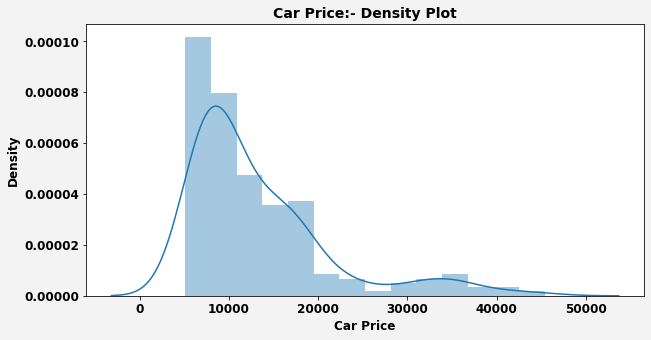

In [24]:
fig = plt.figure(figsize = (10,5))
fig.set_facecolor("#F3F3F3")
sns.distplot(carprice.price)
plt.title('Car Price:- Density Plot', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold');plt.xlabel('Car Price',fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()

The distribution plot seems to be right-skewed, indicating that most data sets regarding car prices are below 20,000.

In [25]:
a = carprice.mean(axis = 0, skipna = True)
b = carprice.var(axis = 0, skipna = True)
c = carprice.skew(axis = 0, skipna = True)
d = carprice.kurtosis(axis = 0, skipna = True)

a.index = b.index
a.index = c.index
a.index = d.index

data_carprice = pd.concat([a, b, c, d] ,axis = 1)
data_carprice.columns = ["Mean", "Var", "Skewness", "kurtosis"]
data_carprice=data_carprice.reset_index().rename(index=str, columns={"index": "Variables"})
data_carprice

,Variables,Mean,Var,Skewness,kurtosis
0,car_ID,103.000000,3.519167e+03,0.000000,-1.200000
1,symboling,0.834146,1.550789e+00,0.211072,-0.676271
2,wheelbase,98.756585,3.626178e+01,1.050214,1.017039
3,carlength,174.049268,1.522087e+02,0.155954,-0.082895
4,carwidth,65.907805,4.601900e+00,0.904003,0.702764
5,carheight,53.724878,5.970800e+00,0.063123,-0.443812
6,curbweight,2555.565854,2.711079e+05,0.681398,-0.042854
7,enginesize,126.907317,1.734114e+03,1.947655,5.305682
8,boreratio,3.329756,7.335631e-02,0.020156,-0.785042
9,stroke,3.255415,9.834309e-02,-0.689705,2.174396


**1. Skewness = 0 :** Normally distributed; a zero value means that the tails on both sides of the mean balance out overall.

**2. Skewness > 0 :** More weight in the left tail of the distribution.

**3. Skewness < 0 :** More weight in the right tail of the distribution.

For example, a zero value means that the tails on both sides of the mean balance out overall; this is the case for asymmetric distribution, but it can also be true for an asymmetric distribution where one tail is long and thin, and the other is short but fat.

In [26]:
print(datastyle.start+'Positive skewness:'+datastyle.end)
left_skewness_carprice= data_carprice[data_carprice.Skewness >0]
print(left_skewness_carprice['Variables'].unique());Line_Separator1()

# ---------------------------------------------------------------------------------------

print(datastyle.start+'Negative skewness:'+datastyle.end)
right_skewness_carprice= data_carprice[data_carprice.Skewness <0]
print(right_skewness_carprice['Variables'].unique());Line_Separator1()

Positive skewness:
['symboling' 'wheelbase' 'carlength' 'carwidth' 'carheight' 'curbweight'
 'enginesize' 'boreratio' 'compressionratio' 'horsepower' 'peakrpm'
 'citympg' 'highwaympg' 'price']
**************************************************************************************************** 

Negative skewness:
['stroke']
**************************************************************************************************** 



**1. Positive Skew:** Mean > Median

**2. Negative Skew:** Median > Mean

**3. Zero Skew:** Mean = Median (Normal Distribution)

In [27]:
print(datastyle.start+'The basic statistical details of car price :\n'+datastyle.end, carprice.price.describe());Line_Separator()

The basic statistical details of car price :
 count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64
************************************************** 



A significant difference observes between the mean and median value of price distribution.

In [28]:
print(datastyle.start+"List of Company Names  are listed in Decreasing Order of the Mean Sales Value"+datastyle.end);Line_Separator1()
print(carprice.groupby(['CompanyName']).mean().sort_values(by='price',ascending=False).reset_index(drop=False).CompanyName.values);Line_Separator1()

List of Company Names  are listed in Decreasing Order of the Mean Sales Value
**************************************************************************************************** 

['Jaguar' 'Buick' 'Porsche' 'BMW' 'Volvo' 'Audi' 'Mercury' 'Alfa-Romeo'
 'Peugeot' 'Saab' 'Mazda' 'Nissan' 'Volkswagen' 'Toyota' 'Renault'
 'Mitsubishi' 'Isuzu' 'Subaru' 'Honda' 'Plymouth' 'Dodge' 'Chevrolet']
**************************************************************************************************** 



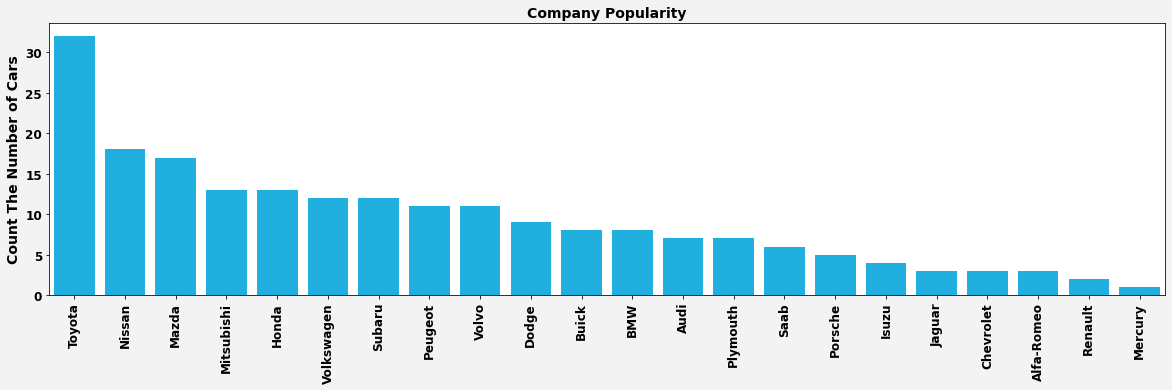

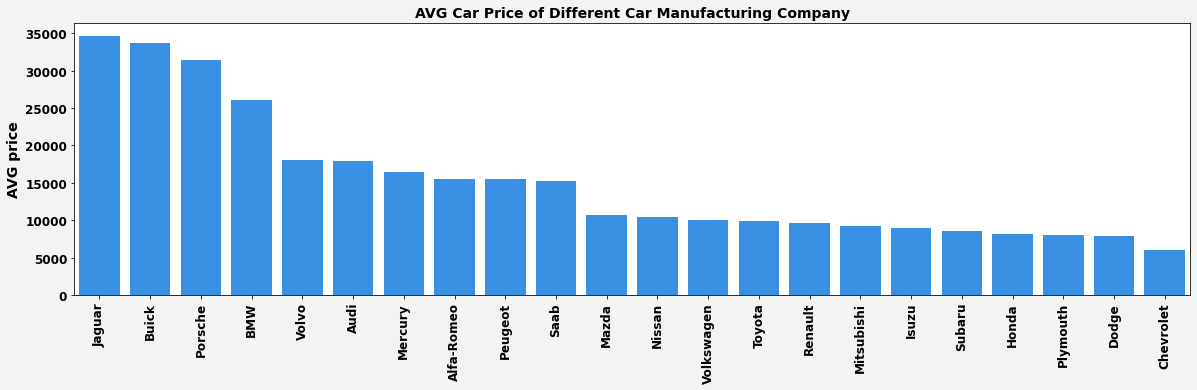

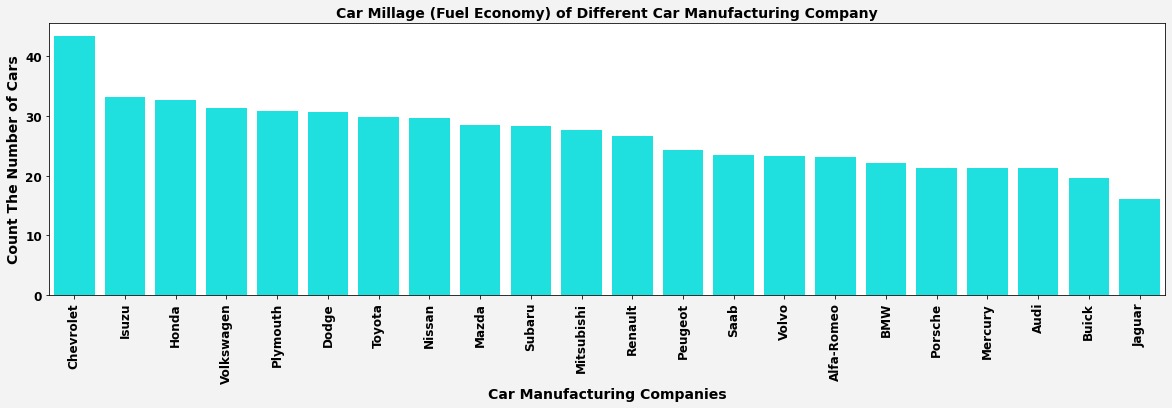

In [29]:
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

colr = {'#00BFFF'}

sns.countplot(data=carprice, x='CompanyName',palette=colr, order=carprice['CompanyName'].value_counts().index)

plt.title('Company Popularity', fontsize=14, fontweight='bold')
plt.ylabel('Count The Number of Cars', fontsize=14, fontweight='bold')
plt.xlabel(None)
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(rotation=90, fontsize=12, fontweight='bold')
plt.show()


fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

colr = {'#1E90FF'}

sns.barplot(data=carprice, x='CompanyName',y='price',ci=None, palette=colr,
            order=carprice.groupby(['CompanyName']).mean().sort_values(by='price',ascending=False).reset_index(drop=False).CompanyName.values)

plt.title('AVG Car Price of Different Car Manufacturing Company', fontsize=14, fontweight='bold')
plt.ylabel('AVG price', fontsize=14, fontweight='bold')
plt.xlabel(None)
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(rotation=90, fontsize=12, fontweight='bold')

           
plt.show()

# Deriving new features
carprice.loc[:,'FuelEconomy']=(0.55 *carprice['citympg']) + (0.45 *carprice['highwaympg'])
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

colr = {'#00FFFF'}

sns.barplot(data=carprice, x='CompanyName',y='FuelEconomy',ci=None, palette=colr,
            order=carprice.groupby(['CompanyName']).mean().sort_values(by='FuelEconomy',ascending=False).reset_index(drop=False).CompanyName.values)

plt.title('Car Millage (Fuel Economy) of Different Car Manufacturing Company', fontsize=14, fontweight='bold')
plt.ylabel('Count The Number of Cars', fontsize=14, fontweight='bold')
plt.xlabel('Car Manufacturing Companies', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(rotation=90, fontsize=12, fontweight='bold')
           
plt.show()

1. Based on average price, Chevrolet is the cheapest car among all other companies while Jaguar is comparatively very expensive. These variables we will consider while building the model.

2. The companies' name list is more extensive, and it would be easy to segment them based on the average price such that it would be easy to define dummy variables.

3. Fuel economy in mileage is better with Chevrolet, General Motors followed by ISUZU, and Honda. This could probably depend on engine capacity in general.

In [30]:
print(datastyle.start+"List of Company Names  are listed in Decreasing Order of the Mean Sales Value :"+datastyle.end)
print(carprice.groupby(['CompanyName']).mean().sort_values(by='price',ascending=False).reset_index(drop=False).CompanyName.values);Line_Separator1()
print(datastyle.start+ "Total Number of Car Company Unique List :")
print(len(carprice.groupby(['CompanyName']).mean().sort_values(by='price',ascending=False).reset_index(drop=False).CompanyName.values));Line_Separator1()

List of Company Names  are listed in Decreasing Order of the Mean Sales Value :
['Jaguar' 'Buick' 'Porsche' 'BMW' 'Volvo' 'Audi' 'Mercury' 'Alfa-Romeo'
 'Peugeot' 'Saab' 'Mazda' 'Nissan' 'Volkswagen' 'Toyota' 'Renault'
 'Mitsubishi' 'Isuzu' 'Subaru' 'Honda' 'Plymouth' 'Dodge' 'Chevrolet']
**************************************************************************************************** 

Total Number of Car Company Unique List :
22
**************************************************************************************************** 



In [31]:
# Market segment based on mean price 1. Low_price, 2. budeget_price, 3. high_price

print(datastyle.start+"1. Low_End_Price    :"+ datastyle.end, 'Chevrolet','Dodge','Plymouth','Honda','Subaru', 'Isuzu')
print(datastyle.start+"2. Budeget_Price    :"+ datastyle.end, 'Mitsubishi', 'Renault', 'Toyota','Volkswagen', 'Nissan', 'Mazda')
print(datastyle.start+"3. Medium_End_Price :"+ datastyle.end, 'Saab', 'Peugeot', 'Alfa-Romeo','Alfa-Romeo', 'Mercury', 'Audi', 'Volvo')
print(datastyle.start+"4. High_End_Price   :"+ datastyle.end, 'BMW', 'Porsche', 'Buick', 'Jaguar');Line_Separator()


def company_segement_on_price(x,y):
    carprice.CompanyName.replace(x,y, inplace=True)

# Low End Price       
company_segement_on_price('Chevrolet','Low_End_Price')
company_segement_on_price('Dodge','Low_End_Price')
company_segement_on_price('Plymouth','Low_End_Price')
company_segement_on_price('Honda','Low_End_Price')
company_segement_on_price('Subaru','Low_End_Price')
company_segement_on_price('Isuzu', 'Low_End_Price')

# Budeget Price
company_segement_on_price('Mitsubishi','Budeget_Price')
company_segement_on_price('Renault','Budeget_Price')
company_segement_on_price('Toyota','Budeget_Price')
company_segement_on_price('Volkswagen','Budeget_Price')
company_segement_on_price('Nissan','Budeget_Price')
company_segement_on_price('Mazda','Budeget_Price')


# Meidum End price           
company_segement_on_price('Saab','Medium_End_Price')
company_segement_on_price('Peugeot','Medium_End_Price')
company_segement_on_price('Alfa-Romeo', 'Medium_End_Price')
company_segement_on_price('Mercury','Medium_End_Price')
company_segement_on_price('Audi','Medium_End_Price')
company_segement_on_price('Volvo','Medium_End_Price')


# High End Price
company_segement_on_price('BMW','Medium_End_Price')
company_segement_on_price('Porsche','High_End_Price')
company_segement_on_price('Buick','High_End_Price')
company_segement_on_price('Jaguar','High_End_Price')


print(datastyle.start+"5. Change Column Name from Company Name to Market Segment"+ datastyle.end);Line_Separator()

carprice=carprice.rename(columns={"CompanyName": "market_segment"})

1. Low_End_Price    : Chevrolet Dodge Plymouth Honda Subaru Isuzu
2. Budeget_Price    : Mitsubishi Renault Toyota Volkswagen Nissan Mazda
3. Medium_End_Price : Saab Peugeot Alfa-Romeo Alfa-Romeo Mercury Audi Volvo
4. High_End_Price   : BMW Porsche Buick Jaguar
************************************************** 

5. Change Column Name from Company Name to Market Segment
************************************************** 



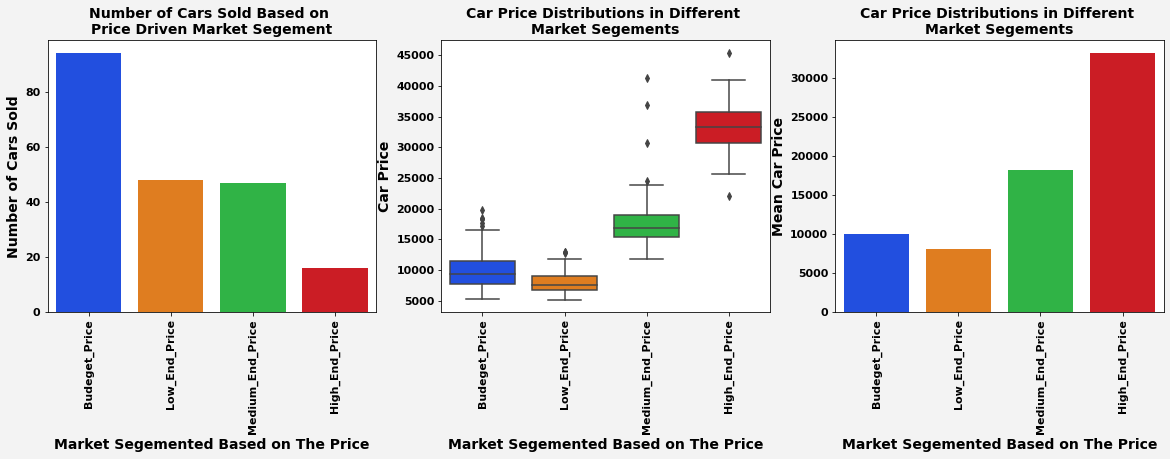

In [32]:
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

plt.subplot(131)

sns.countplot(data=carprice, x='market_segment',palette='bright', order=carprice['market_segment'].value_counts().index)

plt.title('Number of Cars Sold Based on \nPrice Driven Market Segement', fontsize=14, fontweight='bold')
plt.ylabel('Number of Cars Sold', fontsize=14, fontweight='bold')
plt.xlabel('Market Segemented Based on The Price', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(rotation=90,fontsize=11, fontweight='bold')



plt.subplot(132)

sns.boxplot(x = 'market_segment', y = 'price', data = carprice, palette='bright',
           order=carprice['market_segment'].value_counts().index)
plt.title('Car Price Distributions in Different \nMarket Segements', fontsize=14, fontweight='bold')
plt.ylabel('Car Price', fontsize=14, fontweight='bold')
plt.xlabel('Market Segemented Based on The Price', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(rotation=90,fontsize=11, fontweight='bold')


plt.subplot(133)

sns.barplot(data=carprice, x='market_segment',y='price',ci=None, palette='bright',
            order=carprice['market_segment'].value_counts().index)

plt.title('Car Price Distributions in Different \nMarket Segements', fontsize=14, fontweight='bold')
plt.ylabel('Mean Car Price', fontsize=14, fontweight='bold')
plt.xlabel('Market Segemented Based on The Price', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(rotation=90,fontsize=11, fontweight='bold')
plt.show()

The highest selling car is the budget price compared to low-end (surprisingly), followed by medium-end and High-end price. This data indicates that car buying key factor is not price-driven, but other factors play a crucial role in buying the car.

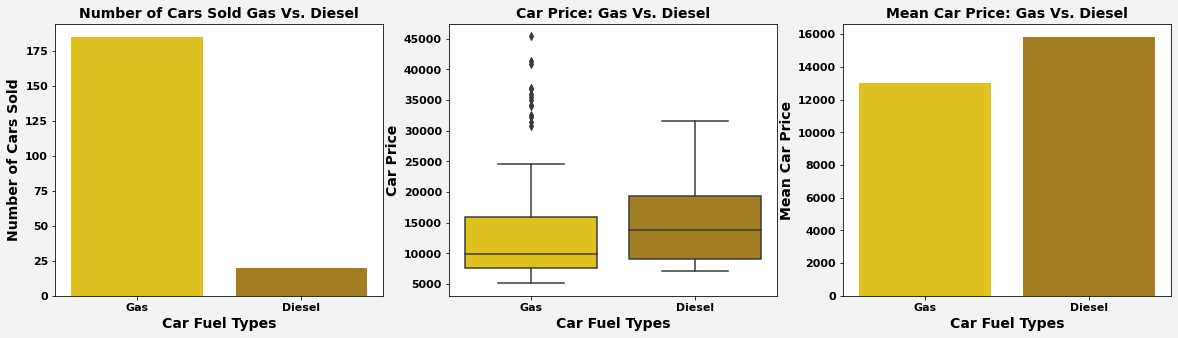

In [33]:
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

plt.subplot(131)

colr = {'Gas': '#FFD700' , 'Diesel': '#B8860B'}
sns.countplot(data=carprice, x='fueltype',palette=colr, order=carprice['fueltype'].value_counts().index)

plt.title('Number of Cars Sold Gas Vs. Diesel', fontsize=14, fontweight='bold')
plt.ylabel('Number of Cars Sold', fontsize=14, fontweight='bold')
plt.xlabel('Car Fuel Types', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')



plt.subplot(132)

colr = {'Gas': '#FFD700' , 'Diesel': '#B8860B'}

sns.boxplot(x = 'fueltype', y = 'price', data = carprice, palette=colr,
           order=carprice['fueltype'].value_counts().index)
plt.title('Car Price: Gas Vs. Diesel', fontsize=14, fontweight='bold')
plt.ylabel('Car Price', fontsize=14, fontweight='bold')
plt.xlabel('Car Fuel Types', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')


plt.subplot(133)

colr = {'Gas': '#FFD700' , 'Diesel': '#B8860B'}

sns.barplot(data=carprice, x='fueltype',y='price',ci=None, palette=colr,
            order=carprice['fueltype'].value_counts().index)

plt.title('Mean Car Price: Gas Vs. Diesel', fontsize=14, fontweight='bold')
plt.ylabel('Mean Car Price', fontsize=14, fontweight='bold')
plt.xlabel('Car Fuel Types', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

plt.show()

More cars have fuel-type gas than diesel. The average price is higher for diesel than gas, and a diesel car is quite expensive than gas based on the higher median price. However, there are a few outliers in the gas car, too, as shown in the boxplot.

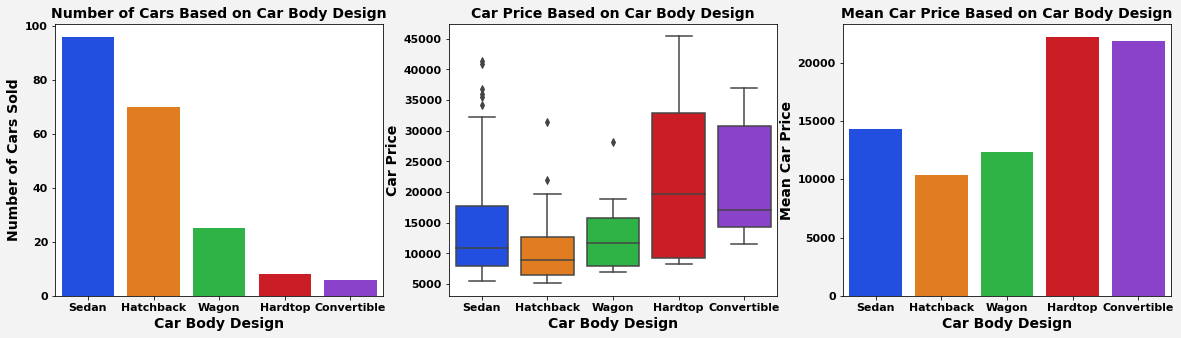

In [34]:
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

plt.subplot(131)

sns.countplot(data=carprice, x='carbody',palette='bright', order=carprice['carbody'].value_counts().index)

plt.title('Number of Cars Based on Car Body Design', fontsize=14, fontweight='bold')
plt.ylabel('Number of Cars Sold', fontsize=14, fontweight='bold')
plt.xlabel('Car Body Design', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')


plt.subplot(132)

sns.boxplot(x = 'carbody', y = 'price', data = carprice, palette='bright',
           order=carprice['carbody'].value_counts().index)
plt.title('Car Price Based on Car Body Design', fontsize=14, fontweight='bold')
plt.ylabel('Car Price', fontsize=14, fontweight='bold')
plt.xlabel('Car Body Design', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')


plt.subplot(133)

sns.barplot(data=carprice, x='carbody',y='price',ci=None, palette='bright',
            order=carprice['carbody'].value_counts().index)
plt.title('Mean Car Price Based on Car Body Design', fontsize=14, fontweight='bold')
plt.ylabel('Mean Car Price', fontsize=14, fontweight='bold')
plt.xlabel('Car Body Design', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

plt.show()

The sedan car is the highest preferred one, followed by the hatchback. The hatchback's price is lower, followed by sedan and wagon based on a median value. However, there are outliers observed in sedan, wagon, and hatchback.

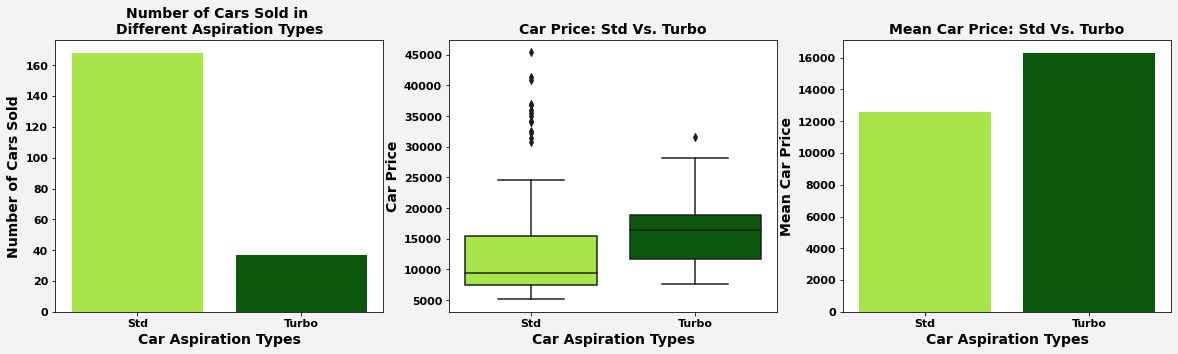

In [35]:
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

plt.subplot(131)

colr = {'Std': '#ADFF2F' , 'Turbo': '#006400'}
sns.countplot(data=carprice, x='aspiration',palette=colr, order=carprice['aspiration'].value_counts().index)

plt.title('Number of Cars Sold in \nDifferent Aspiration Types', fontsize=14, fontweight='bold')
plt.ylabel('Number of Cars Sold', fontsize=14, fontweight='bold')
plt.xlabel('Car Aspiration Types', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')



plt.subplot(132)

colr = {'Std': '#ADFF2F' , 'Turbo': '#006400'}

sns.boxplot(x = 'aspiration', y = 'price', data = carprice, palette=colr,
           order=carprice['aspiration'].value_counts().index)
plt.title('Car Price: Std Vs. Turbo', fontsize=14, fontweight='bold')
plt.ylabel('Car Price', fontsize=14, fontweight='bold')
plt.xlabel('Car Aspiration Types', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')


plt.subplot(133)

colr = {'Std': '#ADFF2F' , 'Turbo': '#006400'}

sns.barplot(data=carprice, x='aspiration',y='price',ci=None, palette=colr,
            order=carprice['aspiration'].value_counts().index)

plt.title('Mean Car Price: Std Vs. Turbo', fontsize=14, fontweight='bold')
plt.ylabel('Mean Car Price', fontsize=14, fontweight='bold')
plt.xlabel('Car Aspiration Types', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

plt.show()

Turbo was observed to have a higher price range than the standard one. However, there are few values observed higher outside the whiskers. The car with turbo aspiration has a higher median value.

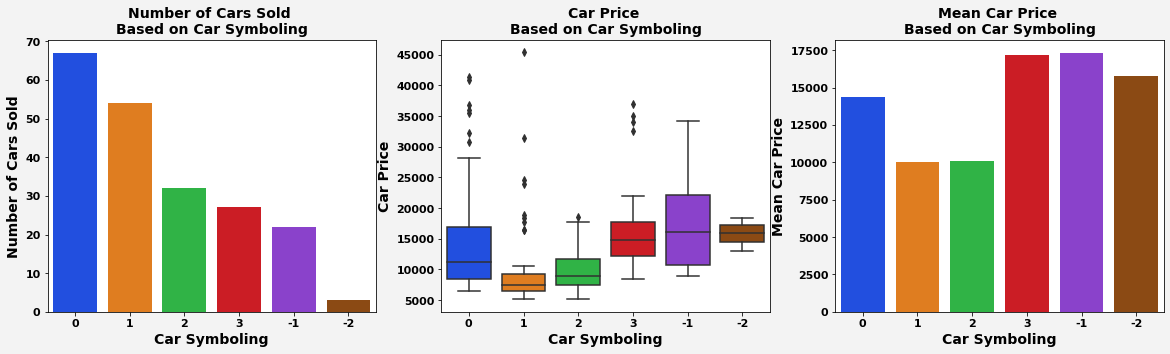

In [36]:
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

plt.subplot(131)

sns.countplot(data=carprice, x='symboling',palette='bright', order=carprice['symboling'].value_counts().index)

plt.title('Number of Cars Sold \nBased on Car Symboling', fontsize=14, fontweight='bold')
plt.ylabel('Number of Cars Sold', fontsize=14, fontweight='bold')
plt.xlabel('Car Symboling', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')


plt.subplot(132)

sns.boxplot(x = 'symboling', y = 'price', data = carprice, palette='bright',
           order=carprice['symboling'].value_counts().index)
plt.title('Car Price \nBased on Car Symboling', fontsize=14, fontweight='bold')
plt.ylabel('Car Price', fontsize=14, fontweight='bold')
plt.xlabel('Car Symboling', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')


plt.subplot(133)

sns.barplot(data=carprice, x='symboling',y='price',ci=None, palette='bright',
            order=carprice['symboling'].value_counts().index)
plt.title('Mean Car Price \nBased on Car Symboling', fontsize=14, fontweight='bold')
plt.ylabel('Mean Car Price', fontsize=14, fontweight='bold')
plt.xlabel('Car Symboling', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

plt.show()

Based on Boxplot, symbolling 1 contains the highest median price, followed by 0 and 2. Symbolling'-1' and '-2' have the highest median car price. The symbolling is also one of the relevant variables' predictors. They are, furthermore, symbolling'-1' to be higher priced. At the same time, symbolling having three values has a price range similar to the '-2' value.

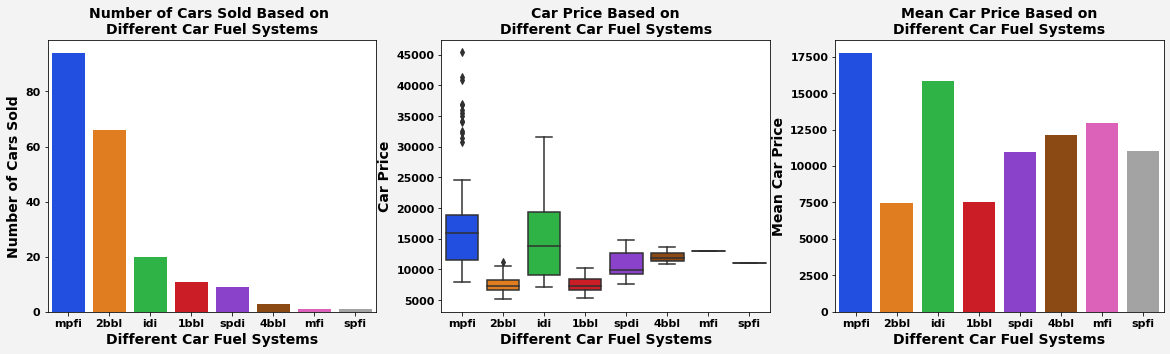

In [37]:
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

plt.subplot(131)

sns.countplot(data=carprice, x='fuelsystem',palette='bright', order=carprice['fuelsystem'].value_counts().index)

plt.title('Number of Cars Sold Based on \nDifferent Car Fuel Systems', fontsize=14, fontweight='bold')
plt.ylabel('Number of Cars Sold', fontsize=14, fontweight='bold')
plt.xlabel('Different Car Fuel Systems', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')


plt.subplot(132)

sns.boxplot(x = 'fuelsystem', y = 'price', data = carprice, palette='bright',
           order=carprice['fuelsystem'].value_counts().index)
plt.title('Car Price Based on\nDifferent Car Fuel Systems', fontsize=14, fontweight='bold')
plt.ylabel('Car Price', fontsize=14, fontweight='bold')
plt.xlabel('Different Car Fuel Systems', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')


plt.subplot(133)

sns.barplot(data=carprice, x='fuelsystem',y='price',ci=None, palette='bright',
            order=carprice['fuelsystem'].value_counts().index)
plt.title('Mean Car Price Based on\nDifferent Car Fuel Systems', fontsize=14, fontweight='bold')
plt.ylabel('Mean Car Price', fontsize=14, fontweight='bold')
plt.xlabel('Different Car Fuel Systems', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

plt.show()

The mpfi is the most occurring fuel system followed by 2bbl. At the same time, mpfi has a higher price but also has outliers.

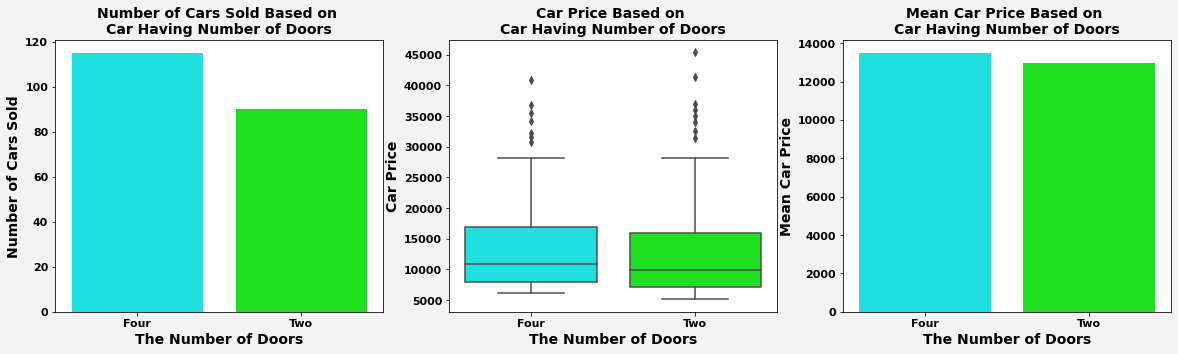

In [38]:
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

plt.subplot(131)

colr = {'Two':'#00FF00', 'Four':'#00FFFF'}

sns.countplot(data=carprice, x='doornumber',palette=colr, order=carprice['doornumber'].value_counts().index)

plt.title('Number of Cars Sold Based on \nCar Having Number of Doors', fontsize=14, fontweight='bold')
plt.ylabel('Number of Cars Sold', fontsize=14, fontweight='bold')
plt.xlabel('The Number of Doors', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')



plt.subplot(132)

colr = {'Two':'#00FF00', 'Four':'#00FFFF'}

sns.boxplot(x = 'doornumber', y = 'price', data = carprice, palette=colr,
           order=carprice['doornumber'].value_counts().index)
plt.title('Car Price Based on \nCar Having Number of Doors', fontsize=14, fontweight='bold')
plt.ylabel('Car Price', fontsize=14, fontweight='bold')
plt.xlabel('The Number of Doors', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')


plt.subplot(133)

colr = {'Two':'#00FF00', 'Four':'#00FFFF'}

sns.barplot(data=carprice, x='doornumber',y='price',ci=None, palette=colr,
            order=carprice['doornumber'].value_counts().index)
plt.title('Mean Car Price Based on \nCar Having Number of Doors', fontsize=14, fontweight='bold')
plt.ylabel('Mean Car Price', fontsize=14, fontweight='bold')
plt.xlabel('The Number of Doors', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

plt.show()

The door number does not play any critical role in defining the car price based on these graphs, and we could say it is an insignificant variable for price.

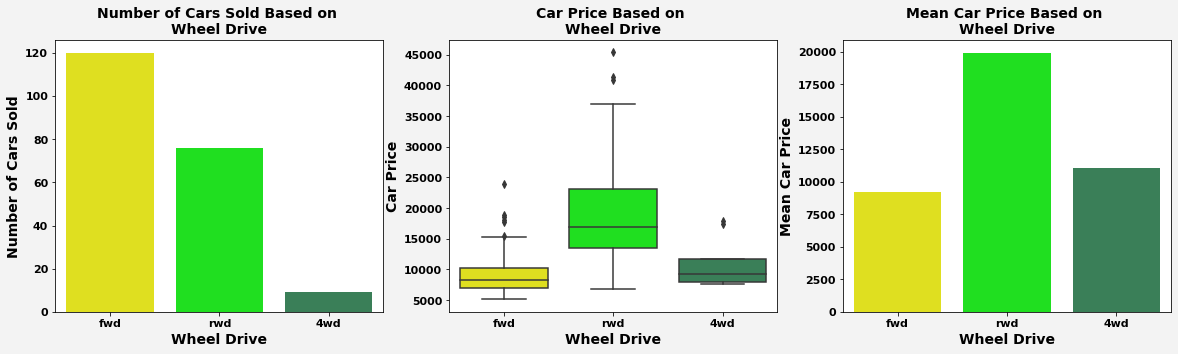

In [39]:
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

plt.subplot(131)

colr = {'rwd':'#00FF00', 'fwd':'#FFFF00','4wd':'#2E8B57'}

sns.countplot(data=carprice, x='drivewheel',palette=colr, order=carprice['drivewheel'].value_counts().index)

plt.title('Number of Cars Sold Based on \nWheel Drive', fontsize=14, fontweight='bold')
plt.ylabel('Number of Cars Sold', fontsize=14, fontweight='bold')
plt.xlabel('Wheel Drive', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')



plt.subplot(132)

colr = {'rwd':'#00FF00', 'fwd':'#FFFF00','4wd':'#2E8B57'}

sns.boxplot(x = 'drivewheel', y = 'price', data = carprice, palette=colr,
           order=carprice['drivewheel'].value_counts().index)
plt.title('Car Price Based on \nWheel Drive', fontsize=14, fontweight='bold')
plt.ylabel('Car Price', fontsize=14, fontweight='bold')
plt.xlabel('Wheel Drive', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')


plt.subplot(133)

colr = {'rwd':'#00FF00', 'fwd':'#FFFF00','4wd':'#2E8B57'}

sns.barplot(data=carprice, x='drivewheel',y='price',ci=None, palette=colr,
            order=carprice['drivewheel'].value_counts().index)
plt.title('Mean Car Price Based on \nWheel Drive', fontsize=14, fontweight='bold')
plt.ylabel('Mean Car Price', fontsize=14, fontweight='bold')
plt.xlabel('Wheel Drive', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

plt.show()

The highest selling care is fwd(front-wheel drive), followed by rwd (reverse wheel drive). The 4wd care is very few. Median and mean price is higher with rwd.

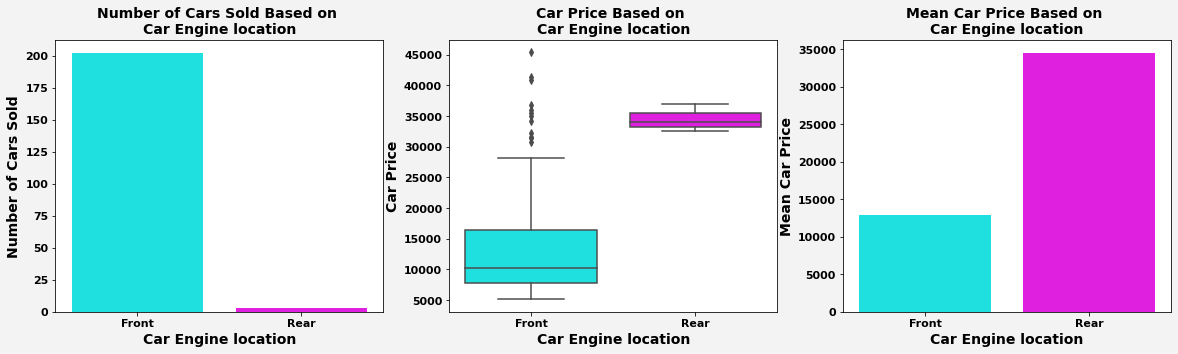

In [40]:
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

plt.subplot(131)

colr = {'Front':'#00FFFF', 'Rear':'#FF00FF'}

sns.countplot(data=carprice, x='enginelocation',palette=colr, order=carprice['enginelocation'].value_counts().index)

plt.title('Number of Cars Sold Based on \nCar Engine location', fontsize=14, fontweight='bold')
plt.ylabel('Number of Cars Sold', fontsize=14, fontweight='bold')
plt.xlabel('Car Engine location', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')



plt.subplot(132)

colr = {'Front':'#00FFFF', 'Rear':'#FF00FF'}

sns.boxplot(x = 'enginelocation', y = 'price', data = carprice, palette=colr,
           order=carprice['enginelocation'].value_counts().index)
plt.title('Car Price Based on \nCar Engine location', fontsize=14, fontweight='bold')
plt.ylabel('Car Price', fontsize=14, fontweight='bold')
plt.xlabel('Car Engine location', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')


plt.subplot(133)

colr = {'Front':'#00FFFF', 'Rear':'#FF00FF'}

sns.barplot(data=carprice, x='enginelocation',y='price',ci=None, palette=colr,
            order=carprice['enginelocation'].value_counts().index)
plt.title('Mean Car Price Based on \nCar Engine location', fontsize=14, fontweight='bold')
plt.ylabel('Mean Car Price', fontsize=14, fontweight='bold')
plt.xlabel('Car Engine location', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

plt.show()

The front-engine has more cars than the median rear value observed to be relatively higher with from engine than the rear. The average price of the rear is more elevated than the front.

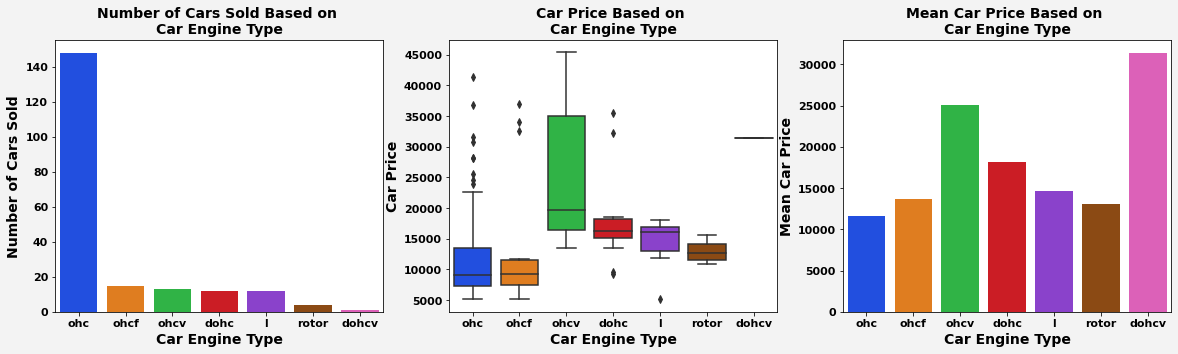

In [41]:
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

plt.subplot(131)

sns.countplot(data=carprice, x='enginetype',palette='bright', order=carprice['enginetype'].value_counts().index)

plt.title('Number of Cars Sold Based on \nCar Engine Type', fontsize=14, fontweight='bold')
plt.ylabel('Number of Cars Sold', fontsize=14, fontweight='bold')
plt.xlabel('Car Engine Type', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')



plt.subplot(132)

sns.boxplot(x = 'enginetype', y = 'price', data = carprice, palette='bright',
           order=carprice['enginetype'].value_counts().index)
plt.title('Car Price Based on \nCar Engine Type', fontsize=14, fontweight='bold')
plt.ylabel('Car Price', fontsize=14, fontweight='bold')
plt.xlabel('Car Engine Type', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')


plt.subplot(133)

sns.barplot(data=carprice, x='enginetype',y='price',ci=None, palette='bright',
            order=carprice['enginetype'].value_counts().index)
plt.title('Mean Car Price Based on \nCar Engine Type', fontsize=14, fontweight='bold')
plt.ylabel('Mean Car Price', fontsize=14, fontweight='bold')
plt.xlabel('Car Engine Type', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

plt.show()

The most preferred engine type is ohc compared to others. The highest median value was observed in ohcv.

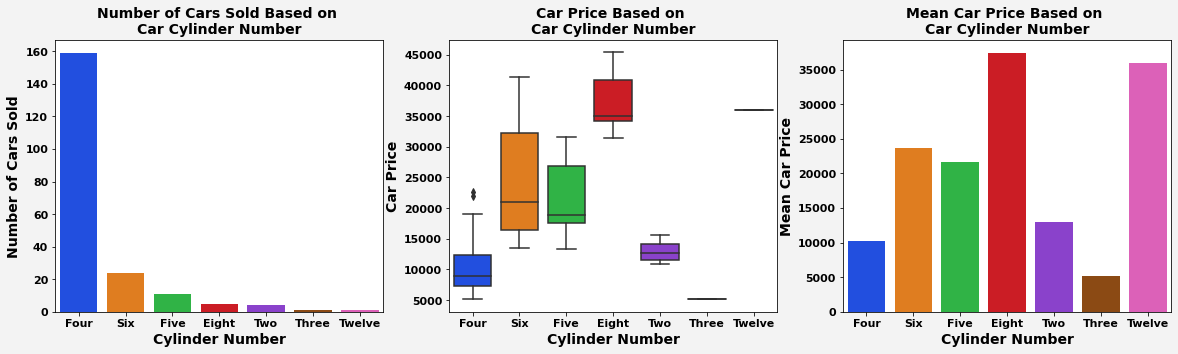

In [42]:
fig = plt.figure(figsize = (20,5))
fig.set_facecolor("#F3F3F3")

plt.subplot(131)

sns.countplot(data=carprice, x='cylindernumber',palette='bright', order=carprice['cylindernumber'].value_counts().index)

plt.title('Number of Cars Sold Based on \nCar Cylinder Number', fontsize=14, fontweight='bold')
plt.ylabel('Number of Cars Sold', fontsize=14, fontweight='bold')
plt.xlabel('Cylinder Number', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')



plt.subplot(132)

sns.boxplot(x = 'cylindernumber', y = 'price', data = carprice, palette='bright',
           order=carprice['cylindernumber'].value_counts().index)
plt.title('Car Price Based on \nCar Cylinder Number', fontsize=14, fontweight='bold')
plt.ylabel('Car Price', fontsize=14, fontweight='bold')
plt.xlabel('Cylinder Number', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')


plt.subplot(133)

sns.barplot(data=carprice, x='cylindernumber',y='price',ci=None, palette='bright',
            order=carprice['cylindernumber'].value_counts().index)
plt.title('Mean Car Price Based on \nCar Cylinder Number', fontsize=14, fontweight='bold')
plt.ylabel('Mean Car Price', fontsize=14, fontweight='bold')
plt.xlabel('Cylinder Number', fontsize=14, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

plt.show()

Four six, and five are the most common number of cylinders. Moreover, the eight cylinders have the highest price range.

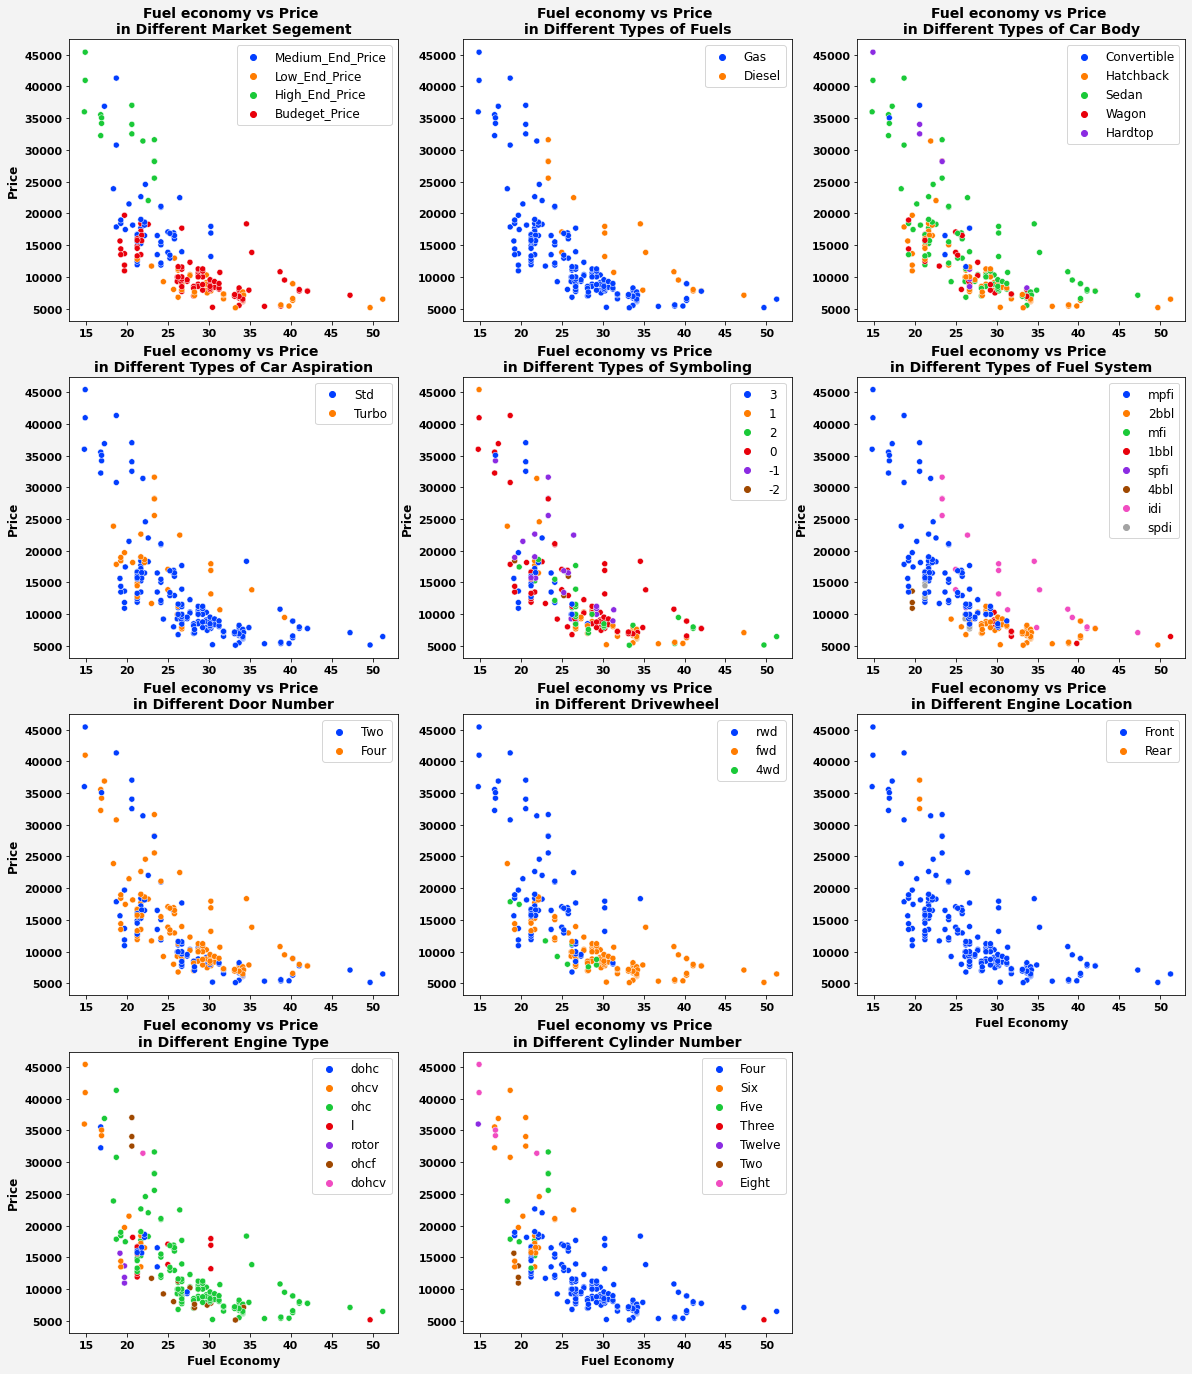

In [43]:
fig = plt.figure(figsize = (20,30))
fig.set_facecolor("#F3F3F3")

plt.subplot(531)

sns.scatterplot(x='FuelEconomy',y='price',hue='market_segment',palette='bright', 
                data=carprice, 
               hue_order= list(carprice['market_segment'].unique()))
plt.legend(fontsize=12, loc='upper right') 
plt.title('Fuel economy vs Price \nin Different Market Segement',fontsize=14, fontweight='bold')
plt.ylabel('Price', fontsize=12, fontweight='bold')
plt.xlabel(None)
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

plt.subplot(532)

sns.scatterplot(x='FuelEconomy',y='price',hue='fueltype',palette='bright', 
                data=carprice, 
               hue_order= list(carprice['fueltype'].unique()))
plt.legend(fontsize=12, loc='upper right') 
plt.title('Fuel economy vs Price \nin Different Types of Fuels',fontsize=14, fontweight='bold')
plt.ylabel(None)
plt.xlabel(None)
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

plt.subplot(533)

sns.scatterplot(x='FuelEconomy',y='price',hue='carbody',palette='bright', 
                data=carprice, 
               hue_order= list(carprice['carbody'].unique()))
plt.legend(fontsize=12, loc='upper right') 
plt.title('Fuel economy vs Price \nin Different Types of Car Body',fontsize=14, fontweight='bold')
plt.ylabel(None)
plt.xlabel(None)
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')


plt.subplot(534)

sns.scatterplot(x='FuelEconomy',y='price',hue='aspiration',palette='bright', 
                data=carprice, 
               hue_order= list(carprice['aspiration'].unique()))
plt.legend(fontsize=12, loc='upper right') 
plt.title('Fuel economy vs Price \nin Different Types of Car Aspiration',fontsize=14, fontweight='bold')
plt.ylabel('Price', fontsize=12, fontweight='bold')
plt.xlabel(None)
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')


plt.subplot(535)

sns.scatterplot(x='FuelEconomy',y='price',hue='symboling',palette='bright', 
                data=carprice, 
               hue_order=  list(carprice['symboling'].unique()))
plt.legend(fontsize=12, loc='upper right') 
plt.title('Fuel economy vs Price \nin Different Types of Symboling',fontsize=14, fontweight='bold')
plt.ylabel('Price', fontsize=12, fontweight='bold')
plt.xlabel(None)
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

plt.subplot(536)

sns.scatterplot(x='FuelEconomy',y='price',hue='fuelsystem',palette='bright', 
                data=carprice, 
               hue_order=  list(carprice['fuelsystem'].unique()))
plt.legend(fontsize=12, loc='upper right') 
plt.title('Fuel economy vs Price \nin Different Types of Fuel System',fontsize=14, fontweight='bold')
plt.ylabel('Price', fontsize=12, fontweight='bold')
plt.xlabel(None)
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')


plt.subplot(537)

sns.scatterplot(x='FuelEconomy',y='price',hue='doornumber',palette='bright', 
                data=carprice, 
               hue_order=  list(carprice['doornumber'].unique()))
plt.legend(fontsize=12, loc='upper right') 
plt.title('Fuel economy vs Price \nin Different Door Number',fontsize=14, fontweight='bold')
plt.ylabel('Price', fontsize=12, fontweight='bold')
plt.xlabel(None)
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold') 



plt.subplot(538)

sns.scatterplot(x='FuelEconomy',y='price',hue='drivewheel',palette='bright', 
                data=carprice, 
               hue_order=  list(carprice['drivewheel'].unique()))
plt.legend(fontsize=12, loc='upper right') 
plt.title('Fuel economy vs Price \nin Different Drivewheel',fontsize=14, fontweight='bold')
plt.ylabel(None)
plt.xlabel(None)
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold') 


plt.subplot(539)

sns.scatterplot(x='FuelEconomy',y='price',hue='enginelocation',palette='bright', 
                data=carprice, 
               hue_order=  list(carprice['enginelocation'].unique()))
plt.legend(fontsize=12, loc='upper right') 
plt.title('Fuel economy vs Price \nin Different Engine Location',fontsize=14, fontweight='bold')
plt.ylabel(None)
plt.xlabel('Fuel Economy', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold') 

plt.subplot(5,3,10)

sns.scatterplot(x='FuelEconomy',y='price',hue='enginetype',palette='bright', 
                data=carprice, 
               hue_order=  list(carprice['enginetype'].unique()))
plt.legend(fontsize=12, loc='upper right') 
plt.title('Fuel economy vs Price \nin Different Engine Type',fontsize=14, fontweight='bold')
plt.ylabel('Price', fontsize=12, fontweight='bold')
plt.xlabel('Fuel Economy', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

plt.subplot(5,3,11)

sns.scatterplot(x='FuelEconomy',y='price',hue='cylindernumber',palette='bright', 
                data=carprice, 
               hue_order=  list(carprice['cylindernumber'].unique()))
plt.legend(fontsize=12, loc='upper right') 
plt.title('Fuel economy vs Price \nin Different Cylinder Number',fontsize=14, fontweight='bold')
plt.ylabel(None)
plt.xlabel('Fuel Economy', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=11, fontweight='bold')

plt.show()

**Fuel Type:-** Car having the gas fuel is widely distributed in all the price range from the lowest to the highest sales price. Car having the gas seems to be the most preferred choice than diesel. 

**Car Body:-**  Sadan is the most preferred choice as it finds all price ranges from the lowest to highest.

**Car Aspiration:-** Std is the most preferred choice than the turbo.

**Symboling:-** Symboling zero is the most preferred choice over others. 

**Car Fuel System:-** The mpfi is the most selected medium to the high-end-price car. The 2bbi is the most preferred choice in the low-end to the budget-price car. The 1bbi is also a preferred choice but not found in a high-end-price car.  
**Car Door Numbers:-** The four-door car is the most preferred choice than two-door cars. 

**Car Drivewheels:-** The rwd is the most preferred for the medium to the high-end sales car. The fwd is the most preferred medium to the low-end sales car. 

**Car Engine Location:-** The front location is the most preferred choice than the rear site. 

**Car Engine Type:-** The ohc engine is the most popular choice. 

**Cylinder Numbers:-** Cylinder number four is the most preferred for the medium-end to the low-end sales car.

In [44]:
print(datastyle.start+"Column :cylindernumber"+datastyle.end)
print(datastyle.start+"1. Two       :"+ datastyle.end, "Repalced to the number 2")
print(datastyle.start+"2. Three     :"+ datastyle.end, "Repalced to the number 3")
print(datastyle.start+"3. Four      :"+ datastyle.end, "Repalced to the number 4")
print(datastyle.start+"4. Five      :"+ datastyle.end, "Repalced to the number 5")
print(datastyle.start+"5. Six       :"+ datastyle.end, "Repalced to the number 6")
print(datastyle.start+"6. Eight     :"+ datastyle.end, "Repalced to the number 8")
print(datastyle.start+"7. Twelve    :"+ datastyle.end, "Repalced to the number 12");Line_Separator()



def replace_cylindernumber_to_numb(x,y):
    carprice.cylindernumber.replace(x,y, inplace=True)
    
    
replace_cylindernumber_to_numb('Two', 2)
replace_cylindernumber_to_numb('Three',3)
replace_cylindernumber_to_numb('Four', 4)
replace_cylindernumber_to_numb('Five', 5)
replace_cylindernumber_to_numb('Six', 6)
replace_cylindernumber_to_numb('Eight', 8)
replace_cylindernumber_to_numb('Twelve',12)

# ------------------------------------------------------------------------------------

print(datastyle.start+"Column :fueltype"+datastyle.end)
print(datastyle.start+"1. Gas        :"+ datastyle.end, "repalced to the number 1")
print(datastyle.start+"2. Diesel     :"+ datastyle.end, "repalced to the number 0");Line_Separator()

def replace_fueltype_to_numb(x,y):
    carprice.fueltype.replace(x,y, inplace=True)
    
    
replace_fueltype_to_numb('Gas', 1)
replace_fueltype_to_numb('Diesel', 0)

# ------------------------------------------------------------------------------------

print(datastyle.start+"Column :doornumber"+datastyle.end)
print(datastyle.start+"1. Two        :"+ datastyle.end, "repalced to the number 1")
print(datastyle.start+"2. Four       :"+ datastyle.end, "repalced to the number 0");Line_Separator()

def replace_doornumber_to_numb(x,y):
    carprice.doornumber.replace(x,y, inplace=True)
    
    
replace_doornumber_to_numb('Two', 1)
replace_doornumber_to_numb('Four', 0)


# ------------------------------------------------------------------------------------

print(datastyle.start+"Column :enginelocation"+datastyle.end)
print(datastyle.start+"1. Front        :"+ datastyle.end, "repalced to the number 1")
print(datastyle.start+"2. Rear         :"+ datastyle.end, "repalced to the number 0");Line_Separator()

def replace_enginelocation_to_numb(x,y):
    carprice.enginelocation.replace(x,y, inplace=True)
    
    
replace_enginelocation_to_numb('Front', 1)
replace_enginelocation_to_numb('Rear', 0)

# ------------------------------------------------------------------------------------

print(datastyle.start+"Column :symboling"+datastyle.end)
print(datastyle.start+"1. # 3     :"+ datastyle.end, "repalced to the number High_risk")
print(datastyle.start+"2. # 2     :"+ datastyle.end, "repalced to the number Quite_risk")
print(datastyle.start+"3. # 1     :"+ datastyle.end, "repalced to the number Neautral")
print(datastyle.start+"4. # 0     :"+ datastyle.end, "repalced to the number Safe")
print(datastyle.start+"5. # -1    :"+ datastyle.end, "repalced to the number Quite_safe")
print(datastyle.start+"5. # -2    :"+ datastyle.end, "repalced to the number Much_safe");Line_Separator()

def replace_number_to_name(x,y):
    carprice.symboling.replace(x,y, inplace=True)

replace_number_to_name(3,'High_risk')
replace_number_to_name(2,'Quite_risk')
replace_number_to_name(1,'Neautral')
replace_number_to_name(0,'Safe')
replace_number_to_name(-1,'Quite_safe')
replace_number_to_name(-2,'Much_safe')

Column :cylindernumber
1. Two       : Repalced to the number 2
2. Three     : Repalced to the number 3
3. Four      : Repalced to the number 4
4. Five      : Repalced to the number 5
5. Six       : Repalced to the number 6
6. Eight     : Repalced to the number 8
7. Twelve    : Repalced to the number 12
************************************************** 

Column :fueltype
1. Gas        : repalced to the number 1
2. Diesel     : repalced to the number 0
************************************************** 

Column :doornumber
1. Two        : repalced to the number 1
2. Four       : repalced to the number 0
************************************************** 

Column :enginelocation
1. Front        : repalced to the number 1
2. Rear         : repalced to the number 0
************************************************** 

Column :symboling
1. # 3     : repalced to the number High_risk
2. # 2     : repalced to the number Quite_risk
3. # 1     : repalced to the number Neautral
4. # 0     : repalc

In [45]:
print(datastyle.start+"1. Cylinder Number Column  :"+datastyle.end, "Check The Data Type is", datastyle.start+"",carprice.cylindernumber.dtypes, ""+datastyle.end,"After Repacing Word to Number"); Line_Separator1()
print(datastyle.start+"2. Fuel Type Column        :"+datastyle.end, "Check The Data Type is", datastyle.start+"",carprice.fueltype.dtypes, ""+datastyle.end,"After Repacing to Number"); Line_Separator1()
print(datastyle.start+"3. Door number Column      :"+datastyle.end, "Check The Data Type is", datastyle.start+"",carprice.doornumber.dtypes, ""+datastyle.end,"After Repacing to Number"); Line_Separator1()
print(datastyle.start+"4. Engine Location Column  :"+datastyle.end, "Check The Data Type is", datastyle.start+"",carprice.enginelocation.dtypes, ""+datastyle.end,"After Repacing to Number"); Line_Separator1()
print(datastyle.start+"5. symboling Column        :"+datastyle.end, "Check The Data Type is", datastyle.start+"",carprice.symboling.dtypes, ""+datastyle.end,"After Repacing to Categorical"); Line_Separator1()

1. Cylinder Number Column  : Check The Data Type is  int64  After Repacing Word to Number
**************************************************************************************************** 

2. Fuel Type Column        : Check The Data Type is  int64  After Repacing to Number
**************************************************************************************************** 

3. Door number Column      : Check The Data Type is  int64  After Repacing to Number
**************************************************************************************************** 

4. Engine Location Column  : Check The Data Type is  int64  After Repacing to Number
**************************************************************************************************** 

5. symboling Column        : Check The Data Type is  object  After Repacing to Categorical
**************************************************************************************************** 



In [46]:
print(datastyle.start+"1. Dropped car_ID and CarModel Columns from The Data Set  :"+datastyle.end)
carprice=carprice.drop(['car_ID','CarModel'],axis=1)

1. Dropped car_ID and CarModel Columns from The Data Set  :


In [47]:
carprice.head(2)

,symboling,market_segment,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,FuelEconomy
0,High_risk,Medium_End_Price,1,Std,1,Convertible,rwd,1,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,23.7
1,High_risk,Medium_End_Price,1,Std,1,Convertible,rwd,1,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,23.7


In [48]:
carprice.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   market_segment    205 non-null    object 
 2   fueltype          205 non-null    int64  
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    int64  
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    int64  
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

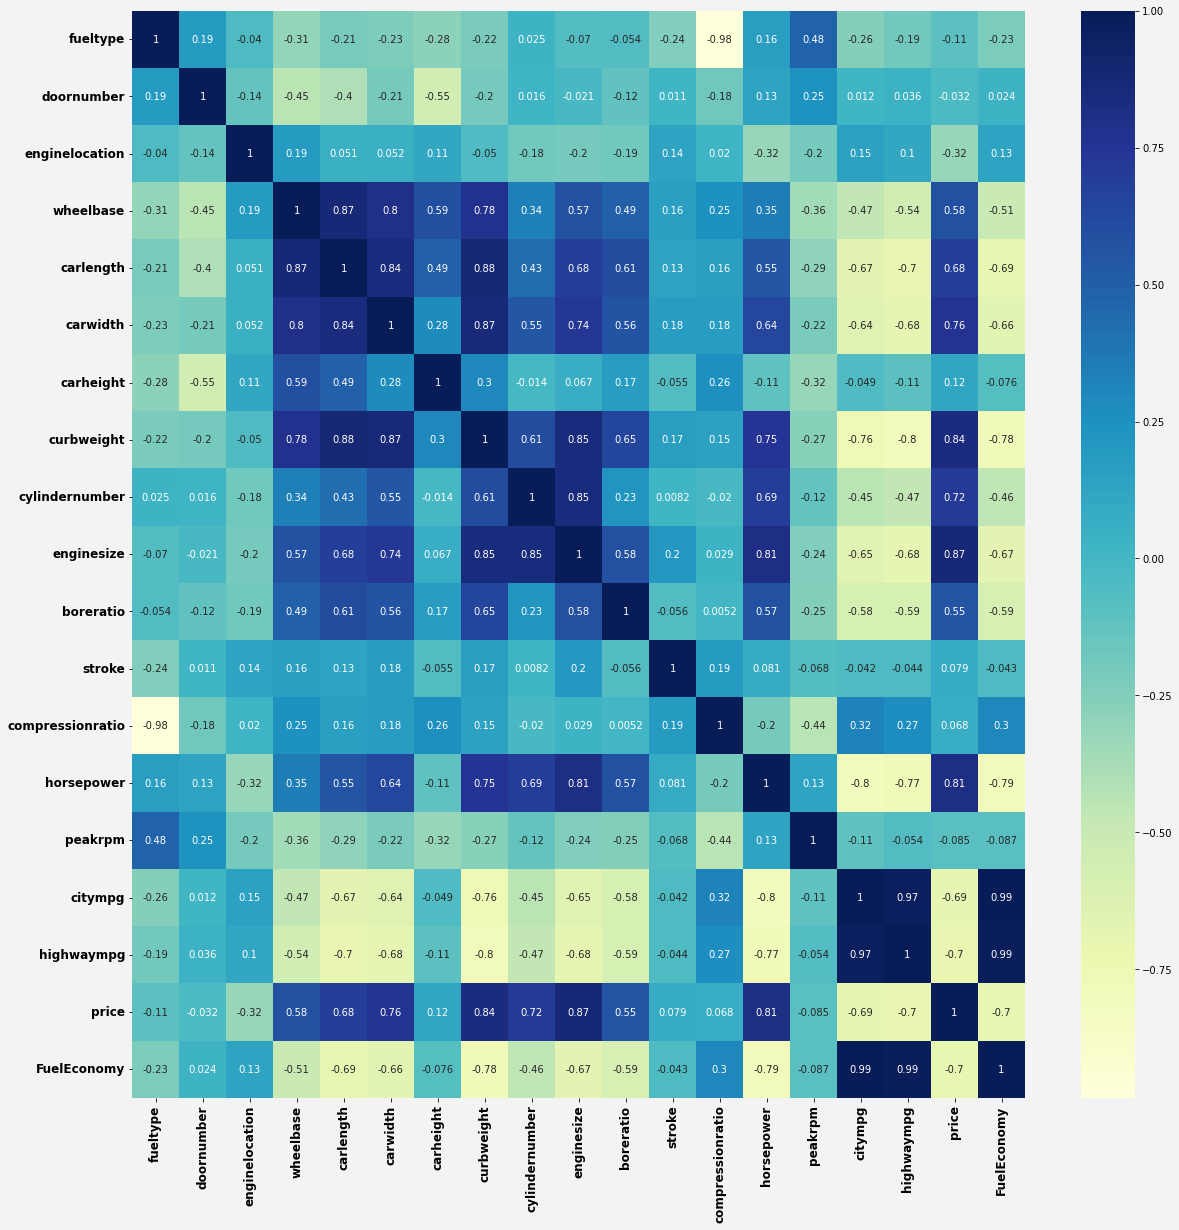

**************************************************************************************************** 

Features having correlation 0.70 above :  8

['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'highwaympg', 'price', 'FuelEconomy']
**************************************************************************************************** 

Features having correlation -0.70 above:  4

['compressionratio', 'citympg', 'highwaympg', 'FuelEconomy']
**************************************************************************************************** 



In [49]:
# Heatmap

num_vars=carprice.select_dtypes(include=['float64','int64']).columns
g= carprice[num_vars].corr()

fig= plt.figure(figsize=(20,20))
fig.set_facecolor("#F3F3F3") 
sns.heatmap(g,cmap="YlGnBu",annot = True)
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show();Line_Separator1()

# Upper value
Upper_Value = g.where(np.triu(np.ones(g.shape), k=1).astype(np.bool))

# Features having a Higher correlation of more than 0.5
High_Corr_features_positive = [column for column in Upper_Value.columns if any(Upper_Value[column] > 0.70)]

# 
High_Corr_features_negative =[column for column in Upper_Value.columns if any(Upper_Value[column] < -0.70)]

print(datastyle.start+"Features having correlation 0.70 above : "+datastyle.end, "{}\n\n{}".format(len(High_Corr_features_positive), High_Corr_features_positive));Line_Separator1()
print(datastyle.start+"Features having correlation -0.70 above: "+datastyle.end, "{}\n\n{}".format(len(High_Corr_features_negative), High_Corr_features_negative));Line_Separator1()

<Figure size 1440x1440 with 0 Axes>

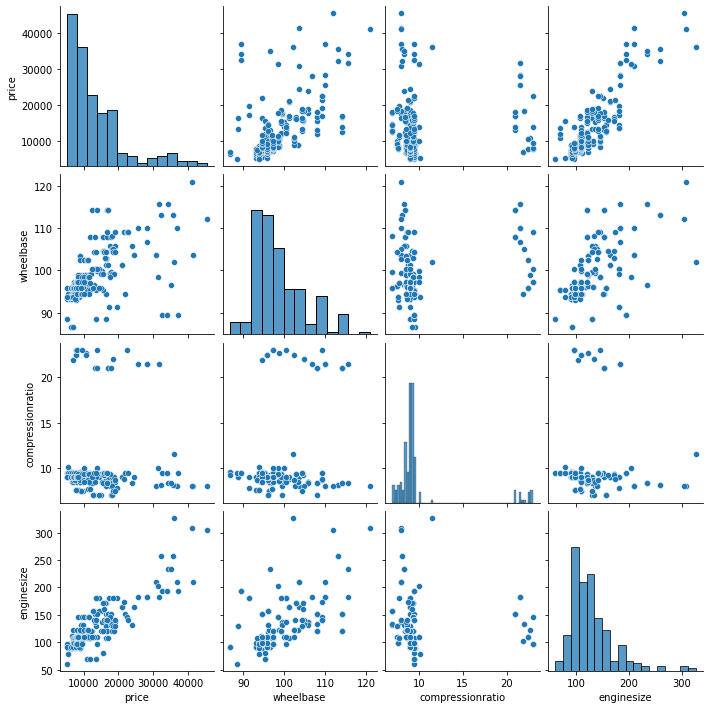

In [50]:
fig= plt.figure(figsize=(20,20))
sns.pairplot(carprice[['price','wheelbase', 'compressionratio', 'enginesize']])
plt.show()

Wheelbase and engine size show a positive trend in the car price, and there is also a positive correlation between wheelbase and engine size.

<Figure size 1440x1440 with 0 Axes>

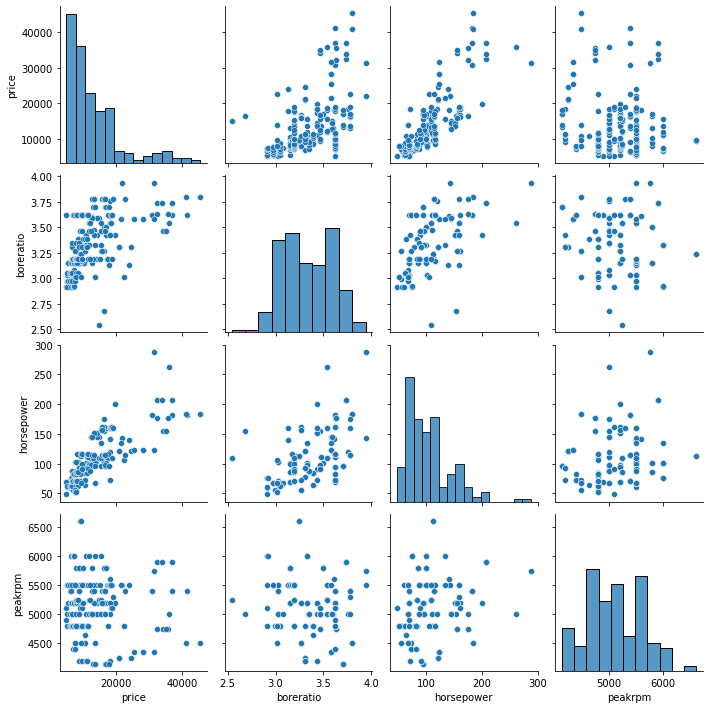

In [51]:
fig= plt.figure(figsize=(20,20))
sns.pairplot(carprice[['price','boreratio', 'horsepower', 'peakrpm']])
plt.show()

boreratio and horsepower show a positive correlation to car price. At the same time, boreratio and horsepower show a positive correlation.

<Figure size 1440x1440 with 0 Axes>

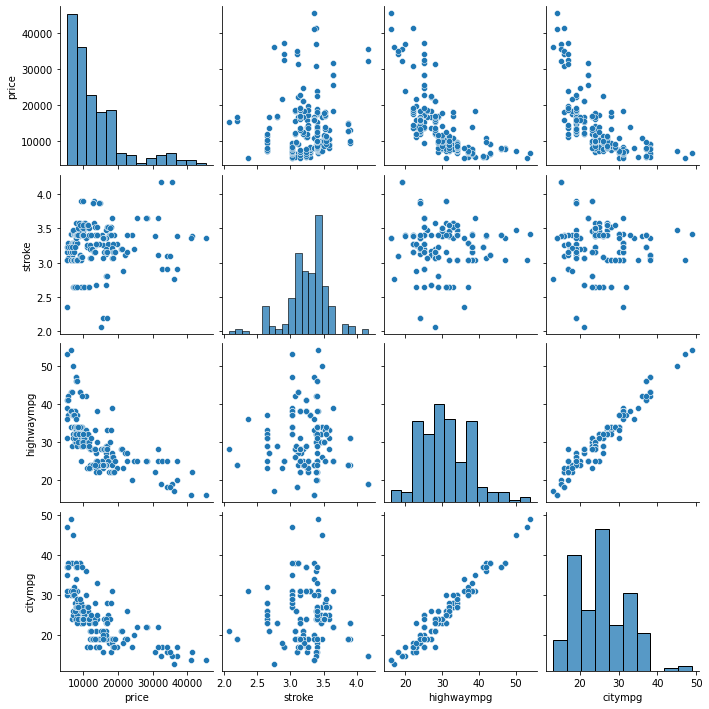

In [52]:
fig= plt.figure(figsize=(20,20))
sns.pairplot(carprice[['price','stroke', 'highwaympg', 'citympg']])
plt.show()

Citympg and highwaympg show negatively correlated to car price. Moreover, between citympg and highwaympg, there is a positive correlation.

<Figure size 1440x1440 with 0 Axes>

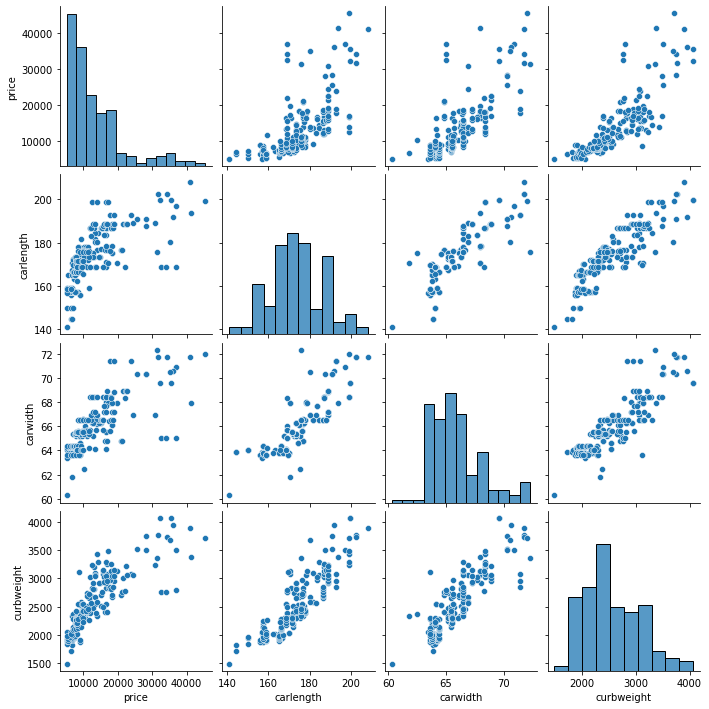

In [53]:
fig= plt.figure(figsize=(20,20))
sns.pairplot(carprice[['price','carlength', 'carwidth','curbweight']])
plt.show()

Carlength, carwidth, and curbweight show a positive correlation to car price. At the same time between them, there is a perfect correlation observed.

We will drop following columns:

['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'highwaympg', 'price', 'FuelEconomy']
**************************************************************************************************** 

Features having correlation -0.70 above:  4

['compressionratio', 'citympg', 'highwaympg', 'FuelEconomy']

In [54]:
carprice.drop(['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 
               'highwaympg', 'FuelEconomy','compressionratio', 'citympg', 
               'highwaympg', 'FuelEconomy'], axis =1, inplace = True)
carprice.head(2)

,symboling,market_segment,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,peakrpm,price
0,High_risk,Medium_End_Price,1,Std,1,Convertible,rwd,1,88.6,48.8,dohc,4,mpfi,3.47,2.68,5000,13495.0
1,High_risk,Medium_End_Price,1,Std,1,Convertible,rwd,1,88.6,48.8,dohc,4,mpfi,3.47,2.68,5000,16500.0


In [55]:
print(datastyle.start+'Remaining columns in data set after dropping the highly correlated columns:'+datastyle.end) 
print(carprice.columns);Line_Separator1()

Remaining columns in data set after dropping the highly correlated columns:
Index(['symboling', 'market_segment', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carheight',
       'enginetype', 'cylindernumber', 'fuelsystem', 'boreratio', 'stroke',
       'peakrpm', 'price'],
      dtype='object')
**************************************************************************************************** 



In [56]:
print(carprice.info());Line_Separator()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   symboling       205 non-null    object 
 1   market_segment  205 non-null    object 
 2   fueltype        205 non-null    int64  
 3   aspiration      205 non-null    object 
 4   doornumber      205 non-null    int64  
 5   carbody         205 non-null    object 
 6   drivewheel      205 non-null    object 
 7   enginelocation  205 non-null    int64  
 8   wheelbase       205 non-null    float64
 9   carheight       205 non-null    float64
 10  enginetype      205 non-null    object 
 11  cylindernumber  205 non-null    int64  
 12  fuelsystem      205 non-null    object 
 13  boreratio       205 non-null    float64
 14  stroke          205 non-null    float64
 15  peakrpm         205 non-null    int64  
 16  price           205 non-null    float64
dtypes: float64(5), int64(5), object(7)


**Data Normalization, Dummy Variables, Train-Test Split & Power Transformation**

In [57]:
x1=carprice.select_dtypes(include=['float64','int64'])
x1.columns

Index(['fueltype', 'doornumber', 'enginelocation', 'wheelbase', 'carheight',
       'cylindernumber', 'boreratio', 'stroke', 'peakrpm', 'price'],
      dtype='object')

In [58]:
x2=carprice.select_dtypes(include=['object'])
x2.columns

Index(['symboling', 'market_segment', 'aspiration', 'carbody', 'drivewheel',
       'enginetype', 'fuelsystem'],
      dtype='object')

In [59]:
# Data normalization
def normalized (x): 
    return ((x-np.min(x))/ (max(x) - min(x)))
                                                                                          
x1 = x1.apply(normalized) 

In [60]:
carprice_normalized= pd.concat([x1,x2] ,axis = 1)
carprice_normalized  =carprice_normalized[['price','fueltype', 'doornumber', 'enginelocation', 'wheelbase', 'carheight',
       'cylindernumber', 'boreratio', 'stroke', 'peakrpm','symboling', 'market_segment', 'aspiration', 'carbody', 'drivewheel',
       'enginetype', 'fuelsystem']]
carprice_normalized.head(2)

,price,fueltype,doornumber,enginelocation,wheelbase,carheight,cylindernumber,boreratio,stroke,peakrpm,symboling,market_segment,aspiration,carbody,drivewheel,enginetype,fuelsystem
0,0.207959,1.0,1.0,1.0,0.058309,0.083333,0.2,0.664286,0.290476,0.346939,High_risk,Medium_End_Price,Std,Convertible,rwd,dohc,mpfi
1,0.282558,1.0,1.0,1.0,0.058309,0.083333,0.2,0.664286,0.290476,0.346939,High_risk,Medium_End_Price,Std,Convertible,rwd,dohc,mpfi


In [61]:
carprice_withdummy =pd.get_dummies(carprice_normalized)
carprice_withdummy.head(2)

,price,fueltype,doornumber,enginelocation,wheelbase,carheight,cylindernumber,boreratio,stroke,peakrpm,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.207959,1.0,1.0,1.0,0.058309,0.083333,0.2,0.664286,0.290476,0.346939,...,0,0,0,0,0,0,0,1,0,0
1,0.282558,1.0,1.0,1.0,0.058309,0.083333,0.2,0.664286,0.290476,0.346939,...,0,0,0,0,0,0,0,1,0,0


In [62]:
a = carprice_withdummy.mean(axis = 0, skipna = True)
b = carprice_withdummy.var(axis = 0, skipna = True)
c = carprice_withdummy.skew(axis = 0, skipna = True)
d = carprice_withdummy.kurtosis(axis = 0, skipna = True)

a.index = b.index
a.index = c.index
a.index = d.index

data_carprice1 = pd.concat([a, b, c, d] ,axis = 1)
data_carprice1.columns = ["Mean", "Var", "Skewness", "kurtosis"]
data_carprice1=data_carprice1.reset_index().rename(index=str, columns={"index": "Variables"})
data_carprice1

,Variables,Mean,Var,Skewness,kurtosis
0,price,0.202540,0.039332,1.777678,3.051648
1,fueltype,0.902439,0.088474,-2.732619,5.520976
2,doornumber,0.439024,0.247489,0.247552,-1.957916
3,enginelocation,0.985366,0.014491,-8.143531,64.950693
4,wheelbase,0.354419,0.030822,1.050214,1.017039
5,carheight,0.493740,0.041464,0.063123,-0.443812
6,cylindernumber,0.238049,0.011682,2.817459,13.714866
7,boreratio,0.564111,0.037427,0.020156,-0.785042
8,stroke,0.564483,0.022300,-0.689705,2.174396
9,peakrpm,0.398009,0.037903,0.075159,0.086756


In [63]:
df_train,df_test= train_test_split(carprice_withdummy, test_size=0.3, train_size=0.7,  random_state=100)
print(datastyle.start+"\n df_train Data Shape: "+datastyle.end, df_train.shape)
print(datastyle.start+"\n df_test Data Shape : "+datastyle.end, df_test.shape); Line_Separator()


 df_train Data Shape:  (143, 45)

 df_test Data Shape :  (62, 45)
************************************************** 



In [64]:
print(datastyle.start+"List The Columns Name in The df_train Data Set:"+datastyle.end, len(df_train.columns))
print(df_train.columns);Line_Separator()

List The Columns Name in The df_train Data Set: 45
Index(['price', 'fueltype', 'doornumber', 'enginelocation', 'wheelbase',
       'carheight', 'cylindernumber', 'boreratio', 'stroke', 'peakrpm',
       'symboling_High_risk', 'symboling_Much_safe', 'symboling_Neautral',
       'symboling_Quite_risk', 'symboling_Quite_safe', 'symboling_Safe',
       'market_segment_Budeget_Price', 'market_segment_High_End_Price',
       'market_segment_Low_End_Price', 'market_segment_Medium_End_Price',
       'aspiration_Std', 'aspiration_Turbo', 'carbody_Convertible',
       'carbody_Hardtop', 'carbody_Hatchback', 'carbody_Sedan',
       'carbody_Wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fu

In [65]:
print(datastyle.start+"List The Columns Name in The df_train Data Set:"+datastyle.end, len(df_test.columns))
print(df_test.columns);Line_Separator()

List The Columns Name in The df_train Data Set: 45
Index(['price', 'fueltype', 'doornumber', 'enginelocation', 'wheelbase',
       'carheight', 'cylindernumber', 'boreratio', 'stroke', 'peakrpm',
       'symboling_High_risk', 'symboling_Much_safe', 'symboling_Neautral',
       'symboling_Quite_risk', 'symboling_Quite_safe', 'symboling_Safe',
       'market_segment_Budeget_Price', 'market_segment_High_End_Price',
       'market_segment_Low_End_Price', 'market_segment_Medium_End_Price',
       'aspiration_Std', 'aspiration_Turbo', 'carbody_Convertible',
       'carbody_Hardtop', 'carbody_Hatchback', 'carbody_Sedan',
       'carbody_Wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fu

In [66]:
# Skewness observed in the distribution hence will use power transformation by 'yeo-johnson' method
carprice_pt= preprocessing.PowerTransformer(method='yeo-johnson', copy=True)
carprice_pt.fit(df_train)

df_train_pt = carprice_pt.transform(df_train)
df_test_pt = carprice_pt.transform(df_test)

In [67]:
print(datastyle.start+"\n df_train Data Shape After Power Transformation: "+datastyle.end, df_train_pt.shape)
print(datastyle.start+"\n df_test Data Shape After Power Transformation : "+datastyle.end, df_test_pt.shape); Line_Separator1()


 df_train Data Shape After Power Transformation:  (143, 45)

 df_test Data Shape After Power Transformation :  (62, 45)
**************************************************************************************************** 



In [68]:
# df_train Power tranformed data - Convert numpy to dataframe
df_train_pt=pd.DataFrame(df_train_pt, columns = ['price', 'fueltype', 'doornumber', 'enginelocation', 'wheelbase',
       'carheight', 'cylindernumber', 'boreratio', 'stroke', 'peakrpm',
       'symboling_High_risk', 'symboling_Much_safe', 'symboling_Neautral',
       'symboling_Quite_risk', 'symboling_Quite_safe', 'symboling_Safe',
       'market_segment_Budeget_Price', 'market_segment_High_End_Price',
       'market_segment_Low_End_Price', 'market_segment_Medium_End_Price',
       'aspiration_Std', 'aspiration_Turbo', 'carbody_Convertible',
       'carbody_Hardtop', 'carbody_Hatchback', 'carbody_Sedan',
       'carbody_Wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'])

In [69]:
# df_test Power tranformed data - Convert numpy to dataframe

df_test_pt =pd.DataFrame(df_test_pt, columns=['price', 'fueltype', 'doornumber', 'enginelocation', 'wheelbase',
       'carheight', 'cylindernumber', 'boreratio', 'stroke', 'peakrpm',
       'symboling_High_risk', 'symboling_Much_safe', 'symboling_Neautral',
       'symboling_Quite_risk', 'symboling_Quite_safe', 'symboling_Safe',
       'market_segment_Budeget_Price', 'market_segment_High_End_Price',
       'market_segment_Low_End_Price', 'market_segment_Medium_End_Price',
       'aspiration_Std', 'aspiration_Turbo', 'carbody_Convertible',
       'carbody_Hardtop', 'carbody_Hatchback', 'carbody_Sedan',
       'carbody_Wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'])

In [70]:
numvar=df_train_pt[['price','fueltype', 'doornumber', 'enginelocation', 'wheelbase', 'stroke',
       'peakrpm']]
numvar.describe()

,price,fueltype,doornumber,enginelocation,wheelbase,stroke,peakrpm
count,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02
mean,-1.149042e-16,2.950243e-17,-3.260795e-17,2.580686e-15,6.490535e-16,1.832256e-16,-2.329139e-16
std,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00
min,-1.723276e+00,-3.162278e+00,-8.874120e-01,-1.191638e+01,-3.382475e+00,-2.945293e+00,-2.015492e+00
25%,-8.384939e-01,3.162278e-01,-8.874120e-01,8.391814e-02,-6.544962e-01,-4.951657e-01,-6.938085e-01
50%,-1.387120e-01,3.162278e-01,-8.874120e-01,8.391814e-02,-1.978614e-01,1.691370e-02,1.374121e-01
75%,8.716500e-01,3.162278e-01,1.126872e+00,8.391814e-02,6.502616e-01,4.517376e-01,7.687186e-01
max,1.970193e+00,3.162278e-01,1.126872e+00,8.391814e-02,2.123428e+00,3.372109e+00,3.133978e+00


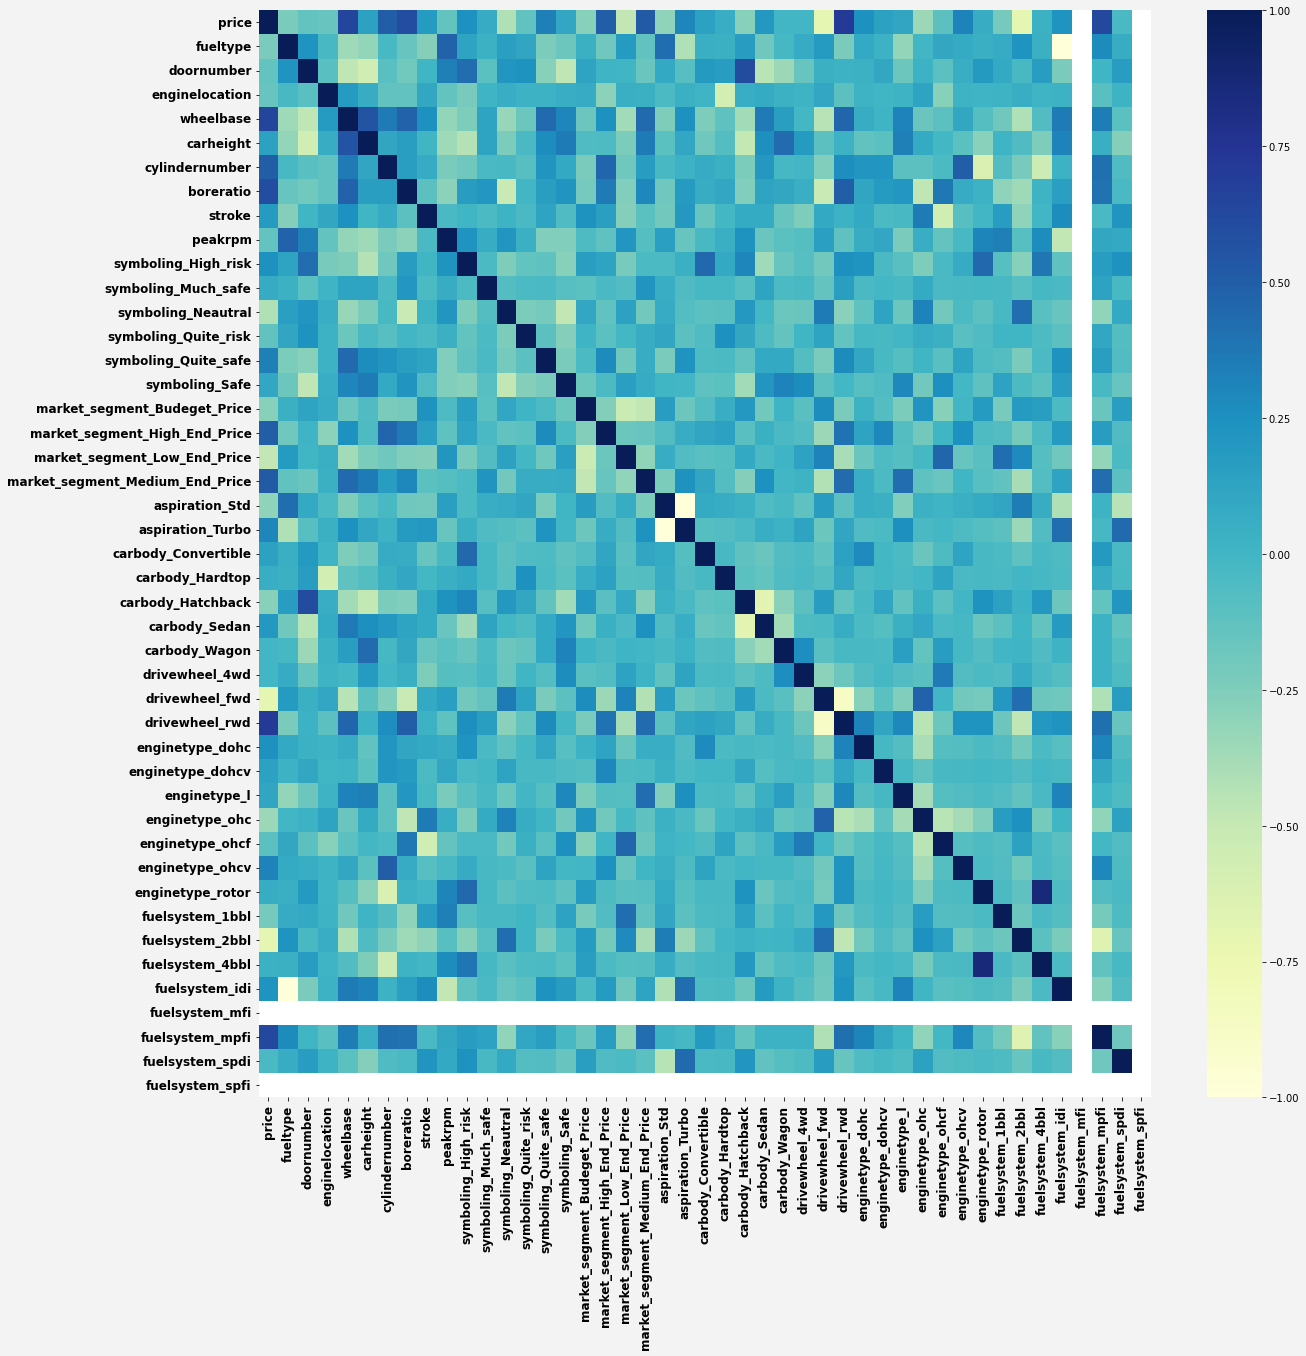

**************************************************************************************************** 

Features having correlation 0.70 above :  2

['drivewheel_rwd', 'fuelsystem_4bbl']
**************************************************************************************************** 

Features having correlation -0.70 above:  3

['aspiration_Turbo', 'drivewheel_rwd', 'fuelsystem_idi']
**************************************************************************************************** 



In [71]:
# Heatmap

g= df_train_pt.corr()

fig= plt.figure(figsize=(20,20))
fig.set_facecolor("#F3F3F3") 
sns.heatmap(g,cmap="YlGnBu",annot = False)
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show();Line_Separator1()

# Upper value
Upper_Value = g.where(np.triu(np.ones(g.shape), k=1).astype(np.bool))

# Features having a Higher correlation of more than 0.5
High_Corr_features_positive = [column for column in Upper_Value.columns if any(Upper_Value[column] > 0.70)]

# 
High_Corr_features_negative =[column for column in Upper_Value.columns if any(Upper_Value[column] < -0.70)]

print(datastyle.start+"Features having correlation 0.70 above : "+datastyle.end, "{}\n\n{}".format(len(High_Corr_features_positive), High_Corr_features_positive));Line_Separator1()
print(datastyle.start+"Features having correlation -0.70 above: "+datastyle.end, "{}\n\n{}".format(len(High_Corr_features_negative), High_Corr_features_negative));Line_Separator1()

In [72]:
y_train=df_train_pt.pop('price')
X_train=df_train_pt

In [73]:
X_train.head(2)

,fueltype,doornumber,enginelocation,wheelbase,carheight,cylindernumber,boreratio,stroke,peakrpm,symboling_High_risk,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.316228,-0.887412,0.083918,-0.857327,-1.140478,-0.280759,-1.347149,-0.113495,0.768719,-0.379473,...,-0.259161,-0.169638,-0.243432,1.363818,-0.146385,-0.316228,0.0,-0.887412,-0.209274,0.0
1,0.316228,1.126872,0.083918,-0.654496,-1.402275,-0.280759,2.202377,-0.495166,0.768719,2.635231,...,-0.259161,-0.169638,-0.243432,-0.733236,-0.146385,-0.316228,0.0,1.126872,-0.209274,0.0


In [74]:
y_train.head(2)

0   -0.821455
1    1.352164
Name: price, dtype: float64

**Model Building**

In [75]:
lm_car = LinearRegression()
lm_car.fit(X_train,y_train)
rfe = RFE(lm_car, n_features_to_select=11) # Running RFE  and 11 is the number of variables choose
rfe = rfe.fit(X_train, y_train)

In [76]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 17),
 ('doornumber', False, 18),
 ('enginelocation', False, 6),
 ('wheelbase', True, 1),
 ('carheight', False, 10),
 ('cylindernumber', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 13),
 ('peakrpm', False, 27),
 ('symboling_High_risk', True, 1),
 ('symboling_Much_safe', False, 12),
 ('symboling_Neautral', False, 20),
 ('symboling_Quite_risk', False, 28),
 ('symboling_Quite_safe', False, 25),
 ('symboling_Safe', False, 9),
 ('market_segment_Budeget_Price', False, 7),
 ('market_segment_High_End_Price', True, 1),
 ('market_segment_Low_End_Price', False, 8),
 ('market_segment_Medium_End_Price', True, 1),
 ('aspiration_Std', False, 11),
 ('aspiration_Turbo', True, 1),
 ('carbody_Convertible', False, 22),
 ('carbody_Hardtop', False, 32),
 ('carbody_Hatchback', True, 1),
 ('carbody_Sedan', False, 24),
 ('carbody_Wagon', False, 23),
 ('drivewheel_4wd', False, 16),
 ('drivewheel_fwd', True, 1),
 ('drivewheel_rwd', False, 15),
 ('enginetype_dohc', False, 29),
 ('eng

In [77]:
X_train_RFE=X_train[X_train.columns[rfe.support_]]
X_train_RFE.head(2)

,wheelbase,cylindernumber,boreratio,symboling_High_risk,market_segment_High_End_Price,market_segment_Medium_End_Price,aspiration_Turbo,carbody_Hatchback,drivewheel_fwd,enginetype_rotor,fuelsystem_2bbl
0,-0.857327,-0.280759,-1.347149,-0.379473,-0.288675,-0.526104,-0.471405,-0.721995,0.826047,-0.169638,1.363818
1,-0.654496,-0.280759,2.202377,2.635231,3.464102,-0.526104,-0.471405,1.385051,-1.210585,-0.169638,-0.733236


In [78]:
def model_summary(x,y):
    x=sm.add_constant(x)
    lrm=sm.OLS(y,x).fit()
    print(lrm.summary())
    return x

In [79]:
print(datastyle.start+"Model 1: "+datastyle.end);Line_Separator1()
X_train_RFEN = model_summary(X_train_RFE,y_train)

Model 1: 
**************************************************************************************************** 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     114.1
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           1.72e-61
Time:                        09:03:22   Log-Likelihood:                -34.231
No. Observations:                 143   AIC:                             92.46
Df Residuals:                     131   BIC:                             128.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.97

In [80]:
def vif_check(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [81]:
# X_train_RFEN = X_train_RFEN.drop(['const'], axis=1)
vif_check(X_train_RFEN)

,Features,VIF
2,cylindernumber,3.39
10,enginetype_rotor,3.10
1,wheelbase,2.35
9,drivewheel_fwd,2.16
5,market_segment_High_End_Price,1.96
3,boreratio,1.89
6,market_segment_Medium_End_Price,1.89
4,symboling_High_risk,1.88
11,fuelsystem_2bbl,1.80
8,carbody_Hatchback,1.34


In [82]:
X_train_RFEN = X_train_RFEN.drop(['const'], axis=1)

**Model : Residual Analysis**

In [83]:
lm = sm.OLS(y_train,X_train_RFEN).fit()
y_train_price = lm.predict(X_train_RFEN)

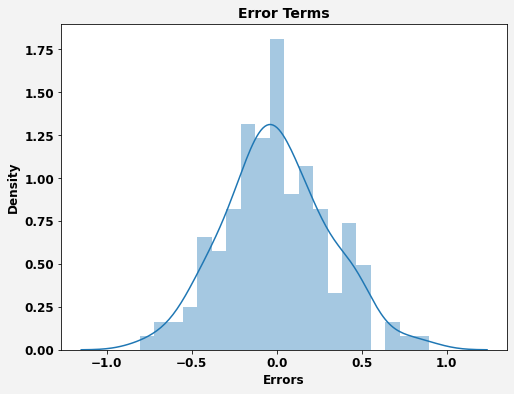

In [84]:
# Plot the histogram of the error terms
fig= plt.figure(figsize=(8,6))
fig.set_facecolor("#F3F3F3")
res=y_train - y_train_price
sns.distplot(res, bins = 20)
plt.title('Error Terms', fontsize = 14, fontweight='bold')                 
plt.xlabel('Errors', fontsize = 12, fontweight='bold')
plt.ylabel('Density', fontsize = 12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()

The graph looks normally distributed with the zero mean value; thus, the assumption on the linear modeling looks fulfilled.

**Prediction and Evaluation**

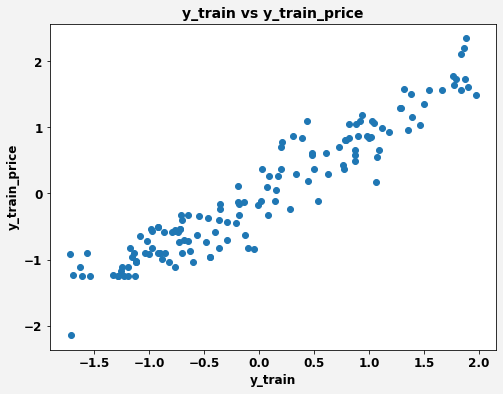

In [85]:
# Plotting y_train and y_train_price for residual study
fig= plt.figure(figsize=(8,6))
fig.set_facecolor("#F3F3F3")
plt.scatter(y_train,y_train_price)
plt.title('y_train vs y_train_price', fontsize=14, fontweight='bold')               
plt.xlabel('y_train', fontsize=12, fontweight='bold')                          
plt.ylabel('y_train_price', fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()  

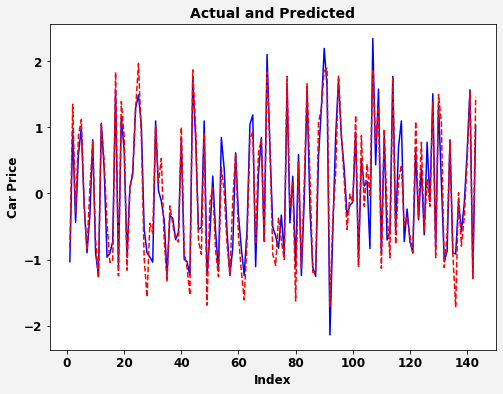

In [86]:
# Actual vs Predicted for train test
a = [i for i in range(1,144,1)]
b = [i for i in range(1,144,1)]
fig= plt.figure(figsize=(8,6))
fig.set_facecolor("#F3F3F3")
plt.plot(a, y_train_price, color="blue", linewidth=1.5, linestyle="-")
plt.plot(b, y_train, color="red",  linewidth=1.5, linestyle="--")
plt.title('Actual and Predicted', fontsize=14,fontweight='bold')               
plt.xlabel('Index', fontsize=12, fontweight='bold')
plt.ylabel('Car Price', fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()

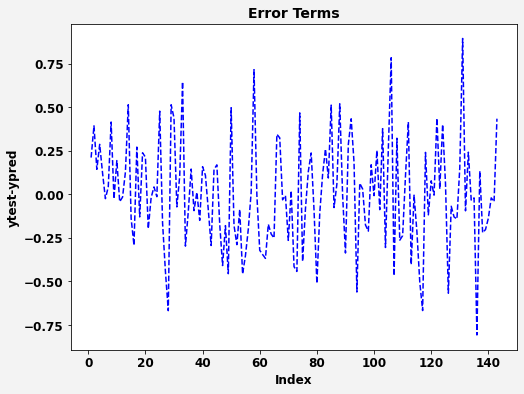

In [87]:
# Error term - train test
c = [i for i in range(1,144,1)]
fig= plt.figure(figsize=(8,6))
fig.set_facecolor("#F3F3F3")
plt.plot(c, y_train-y_train_price, color="blue", linewidth=1.5, linestyle="--")
plt.title('Error Terms', fontsize=14, fontweight='bold')             
plt.xlabel('Index', fontsize=12, fontweight='bold')                      
plt.ylabel('ytest-ypred', fontsize=12, fontweight='bold') 
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()

In [88]:
# Predictions
df_test_pt.head(2)

,price,fueltype,doornumber,enginelocation,wheelbase,carheight,cylindernumber,boreratio,stroke,peakrpm,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-0.782083,0.316228,-0.887412,0.083918,-0.372424,-0.206938,-0.280759,-0.405999,-0.741652,-0.693808,...,-0.259161,-0.169638,-0.243432,1.363818,-0.146385,-0.316228,0.0,-0.887412,-0.209274,0.0
1,-0.563285,0.316228,-0.887412,0.083918,-0.033156,0.889675,-0.280759,-0.405999,0.451738,0.242178,...,-0.259161,-0.169638,-0.243432,-0.733236,-0.146385,-0.316228,0.0,1.126872,-0.209274,0.0


In [89]:
print(datastyle.start+"List The Columns Name in The df_test_pt Data Set:"+datastyle.end, len(df_test_pt.columns))
print(df_test_pt.columns);Line_Separator()

List The Columns Name in The df_test_pt Data Set: 45
Index(['price', 'fueltype', 'doornumber', 'enginelocation', 'wheelbase',
       'carheight', 'cylindernumber', 'boreratio', 'stroke', 'peakrpm',
       'symboling_High_risk', 'symboling_Much_safe', 'symboling_Neautral',
       'symboling_Quite_risk', 'symboling_Quite_safe', 'symboling_Safe',
       'market_segment_Budeget_Price', 'market_segment_High_End_Price',
       'market_segment_Low_End_Price', 'market_segment_Medium_End_Price',
       'aspiration_Std', 'aspiration_Turbo', 'carbody_Convertible',
       'carbody_Hardtop', 'carbody_Hatchback', 'carbody_Sedan',
       'carbody_Wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', '

In [90]:
df_test_pt.describe()

,price,fueltype,doornumber,enginelocation,wheelbase,carheight,cylindernumber,boreratio,stroke,peakrpm,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,6.200000e+01,62.000000,62.000000,6.200000e+01,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.128573,-0.076507,-0.010224,-0.303188,0.131517,0.235366,-0.015086,0.268409,0.059095,-0.034732,...,0.006502,-1.696378e-01,-0.032883,-0.192060,-1.463850e-01,0.076507,0.674152,0.119730,0.032066,0.674152
std,0.932112,1.109845,1.006876,2.137577,1.049142,0.996609,0.689245,1.116563,0.981980,0.984545,...,1.019872,1.119286e-16,0.941348,0.925098,2.238572e-16,1.109845,5.308277,1.015364,1.079011,5.308277
min,-1.606391,-3.162278,-0.887412,-11.916375,-3.382475,-1.756658,-0.280759,-3.549642,-3.202796,-2.015492,...,-0.259161,-1.696378e-01,-0.243432,-0.733236,-1.463850e-01,-0.316228,0.000000,-0.887412,-0.209274,0.000000
25%,-0.572826,0.316228,-0.887412,0.083918,-0.372424,-0.563239,-0.280759,-0.405999,-0.369534,-0.693808,...,-0.259161,-1.696378e-01,-0.243432,-0.733236,-1.463850e-01,-0.316228,0.000000,-0.887412,-0.209274,0.000000
50%,0.006870,0.316228,-0.887412,0.083918,0.072685,0.388108,-0.280759,0.369166,0.282507,-0.279766,...,-0.259161,-1.696378e-01,-0.243432,-0.733236,-1.463850e-01,-0.316228,0.000000,0.119730,-0.209274,0.000000
75%,0.886899,0.316228,1.126872,0.083918,0.930554,0.889675,-0.280759,1.182926,0.658098,0.715931,...,-0.259161,-1.696378e-01,-0.243432,0.839555,-1.463850e-01,-0.316228,0.000000,1.126872,-0.209274,0.000000
max,2.019584,0.316228,1.126872,0.083918,2.435257,2.470753,2.513629,1.770860,2.280894,3.133978,...,3.858612,-1.696378e-01,4.107919,1.363818,-1.463850e-01,3.162278,41.797413,1.126872,4.778424,41.797413


In [91]:
# Dividing into X_test and y_test

y_test = df_test_pt.pop('price')
X_test = df_test_pt

In [92]:
X_train_RFEN.head(2)

,wheelbase,cylindernumber,boreratio,symboling_High_risk,market_segment_High_End_Price,market_segment_Medium_End_Price,aspiration_Turbo,carbody_Hatchback,drivewheel_fwd,enginetype_rotor,fuelsystem_2bbl
0,-0.857327,-0.280759,-1.347149,-0.379473,-0.288675,-0.526104,-0.471405,-0.721995,0.826047,-0.169638,1.363818
1,-0.654496,-0.280759,2.202377,2.635231,3.464102,-0.526104,-0.471405,1.385051,-1.210585,-0.169638,-0.733236


In [93]:
print(datastyle.start+"The data shape of X_train_RFEN:"+datastyle.end,X_train_RFEN.shape);Line_Separator()

The data shape of X_train_RFEN: (143, 11)
************************************************** 



In [94]:
X_test_RFEN =X_test[X_train_RFEN.columns]
X_test_RFEN = sm.add_constant(X_test_RFEN)

In [95]:
print(datastyle.start+"The data shape of X_test_RFEN:"+datastyle.end,X_test_RFEN.shape);Line_Separator()

The data shape of X_test_RFEN: (62, 11)
************************************************** 



In [96]:
y_pred = lm.predict(X_test_RFEN)

In [97]:
r_squared = r2_score(y_test, y_pred)
print(datastyle.start+"The R-Squared of y_test and y_pred          :"+datastyle.end, r_squared)

mse = mean_squared_error(y_test, y_pred)
print(datastyle.start+"The Mean Squared error of y_test and y_pred :"+datastyle.end, mse);Line_Separator1()

The R-Squared of y_test and y_pred          : 0.8623700754669374
The Mean Squared error of y_test and y_pred : 0.11764873784356102
**************************************************************************************************** 



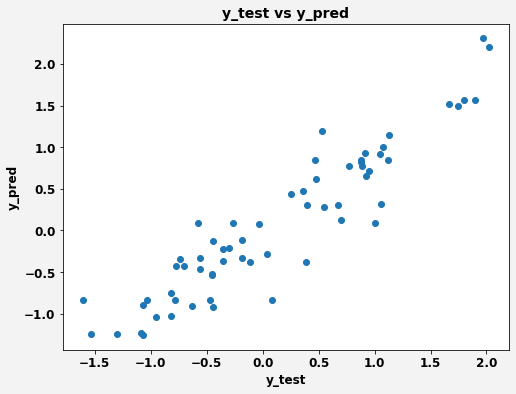

In [98]:
# Model evaluation
# Plotting y_test and y_pred to understand the spread
fig= plt.figure(figsize=(8,6))
fig.set_facecolor("#F3F3F3")
plt.scatter(y_test, y_pred)
plt.title('y_test vs y_pred', fontsize = 14, fontweight='bold')              
plt.xlabel('y_test', fontsize = 12, fontweight='bold')                    
plt.ylabel('y_pred', fontsize = 12, fontweight='bold')  
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()

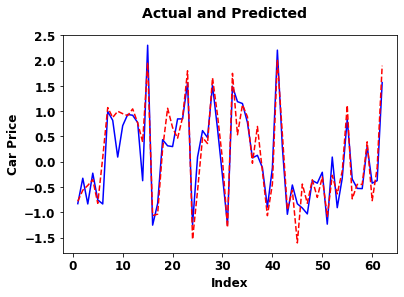

In [99]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
d = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c, y_pred, color="blue", linewidth=1.5, linestyle="-")
plt.plot(d, y_test, color="red",  linewidth=1.5, linestyle="--")
fig.suptitle('Actual and Predicted', fontsize=14, fontweight='bold')               
plt.xlabel('Index', fontsize=12, fontweight='bold')
plt.ylabel('Car Price', fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()

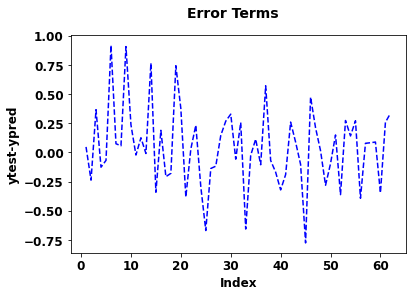

In [100]:
# Error term - train test
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c, y_test-y_pred, color="blue", linewidth=1.5, linestyle="--")
fig.suptitle('Error Terms', fontsize=14, fontweight='bold')             
plt.xlabel('Index', fontsize=12, fontweight='bold')                      
plt.ylabel('ytest-ypred', fontsize=12, fontweight='bold') 
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()

In [101]:
# RMSE score for test set
print(datastyle.start+'1. RMSE Score For Test Set  :'+datastyle.end, np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(datastyle.start+'2. RMSE Score for Train Set :'+datastyle.end, np.sqrt(metrics.mean_squared_error(y_train, y_train_price)));Line_Separator1()

1. RMSE Score For Test Set  : 0.3429996178475437
2. RMSE Score for Train Set : 0.30741385375861946
**************************************************************************************************** 



In [102]:
r_squared_1 = r2_score(y_train, y_train_price)
print(datastyle.start+"The R-Squared of Train Set [y_train and y_train_price] :"+datastyle.end, r_squared_1)
r_squared_2 = r2_score(y_test, y_pred)
print(datastyle.start+"The R-Squared of Test Set [y_test and y_pred]          :"+datastyle.end, r_squared_2);Line_Separator1()

The R-Squared of Train Set [y_train and y_train_price] : 0.9054967225172741
The R-Squared of Test Set [y_test and y_pred]          : 0.8623700754669374
**************************************************************************************************** 



In [103]:
X_train_RFEN = model_summary(X_train_RFE,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     114.1
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           1.72e-61
Time:                        09:03:34   Log-Likelihood:                -34.231
No. Observations:                 143   AIC:                             92.46
Df Residuals:                     131   BIC:                             128.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [104]:
def model_params(x,y):
    x=sm.add_constant(x)
    lrm=sm.OLS(y,x).fit()
    print(lrm.params)
    return x

print(datastyle.start+ "Linear Model Equaltion, Care Price (y) ="+datastyle.end);Line_Separator()
X_train_RFEN = model_params(X_train_RFE,y_train)

Linear Model Equaltion, Care Price (y) =
************************************************** 

const                             -1.196959e-16
wheelbase                          1.674223e-01
cylindernumber                     4.122107e-01
boreratio                          1.291786e-01
symboling_High_risk                1.582790e-01
market_segment_High_End_Price      1.618676e-01
market_segment_Medium_End_Price    2.210135e-01
aspiration_Turbo                   8.361797e-02
carbody_Hatchback                 -9.982494e-02
drivewheel_fwd                    -8.749562e-02
enginetype_rotor                   2.710194e-01
fuelsystem_2bbl                   -2.129216e-01
dtype: float64


**Conclusion:** 

1. The data set indicates the skewness; hence we followed the power transformation before initiating the regression model. 

2. If we reduce the n_features_to_select below eleven, the R Squared and Adjusted R-Squared reduces. The test result (R-Squared) is also negatively impacted. If we increase the n_features_to_select beyond 12, multicollinearity arises.

3. With ten features, R-squared and adjusted R-squared 0.905 and 0.898, respectively, explain 90% variance. 

4. F-statistics and Prob(F-statistics) with the selection of 10 features using the RFE method achieves 114.1, less than 0.05, which indicates the model fits significantly. 

5. The p-value of all the coefficients observe below 0.05 indicates that all predictors are statistically significant. 

6. The R-squared of the test is 0.8623, closer to the trained model R-squared explains model satisfies objective with current test data.

**Explain the linear regression algorithm in detail** 

1. Linear regression is a statistical process in calculating the important of a dependent variable from an independent variable. 

2. It measures the connection between two variables. It is a modeling technique wherein the dependent variable is predicated upon either one or more independent variables. 

3. It is widely used as predictive analysis for all statistical techniques. The linear regression analysis applies mathematical equation that is y=mx+c. 

4. This describes the line of best fit for relationship between y as a dependent variables and x as an independent variable. The r-squared regression coefficient infers the degree of variability of y due to x.

The following steps involve in Linear regression analysis process in a machine learning approach.  

1. Simple linear regression
2. Assumption of simple regression 
  * Linear regression between x and y
  * Normal distribution error terms 
  * Independence of error term
  * The constant variance of error terms
3. Hypothesis testing in linear regression
  * To determine the significance of the beta coefficient 
4. Building the linear regression model
  * OLS (ordinary list squares) method in stats model to fit a line 
  * Summary of statistics 
  * F-statistics, r-squared, coefficient, and p-value
5. Residual analysis 
  * Histogram of the error terms to check the normality 
  * Plot the error terms with x or y to check the independence 
6. Prediction 
  * Predicting the test set using the predict function 
7. Linear regression using sklearn.
  * Second package apparat from statsmodels for linear regression 
  * A more hassle-free package to just fit a line without any inferences 
9. Prediction 
  * Predicting the test set using the predict function 
  * Linear regression using sklearn.
  * Second package apparat from statsmodels for linear regression 
  * A more hassle-free package to just fit a line without any inferences

However, it is critical to use the following steps before above to understand the data. These are:
1. Reading and understanding the data
2. Data cleaning and EDA (data visualization both categorical as well as numerical)
3. Presence of the Multicollinearity in the DATA and treat them accordingly 

**What are the assumptions of linear regression regarding residuals**

The assumptions are:

1.  The regression model is linear in parameters 
2.  Statistical independence
3.  The mean of residuals is zero 
4.  Homoscedasticity of residuals or equal variance
5.  Normality of error distribution 
6.  No autocorrelation of residuals
7.  The X variables and residuals are uncorrelated
8.  The number of observations must be greater than the number of X
9.  The variability in X values is positive
10. The regression model is correctly specified
11. The variability in X values is positive
12. No perfect multicollinearity
13. Normality of residuals

**What is the coefficient of correlation and the coefficient of determination**

* The correlation coefficient is a statistic to determine the degree of association between two different variables. It is represented in value in the range of -1 to 1, and zero indicates that no linear relationship exists between two continuous variables. Moreover, values 1 or -1 indicate a perfect linear relationship between two variables. If the correlation coefficient is positive, the variables are directly related, whereas the negative number indicates variables are inversely related. Any other form of relationship between two continuous variables suggests no linear and no correlation in statistical terms.

* The coefficient of determination (R-squared) is determined as the proportion of dependent variables, which can be described by variation in the independent variables(s). When r-squared is one, it indicates a perfect linear relationship between x and y. It means 100% of the variation in y is explained by variation in x. on other words, r-squared one implies an almost perfect relationship between the model and the data. R-squared zero indicates that just fitting the mean is equivalent to the model fitted. Often, more than one variable is available to explain an outcome (multivariate model); in this situation, as variables are added, the R -squared will increase even if the variable is not essential. Furthermore, when R-squared is (0,1) indicates a weaker linear relationship between x and y, i.e., some but not all the variation in y is explained by variation in x. Moreover, R-squared close to 1 implies an almost perfect relationship between the model and the data. 
 
* An R-squared of 0.10 means that 10 percent of the variance in Y is predictable from X; an r-squared of 0.20 means that 20 percent is predictable; and so on.


**Explain Anscombe's quartet in detail**

Anscombe's quartet comprises four data sets with nearly identical simple descriptive statistics yet have very different distributions and appear very different when graphed. It is advised not to run a regression without having a good look at the data because simple linear regression has quite a few shortcomings, such as:
* It is sensitive to outliers.
* It models linear relationships only.
* A few assumptions are required to make the inference.

**What is Pearson’s R**

Pearson’s R is also known as the correlation coefficient. It is used to measure the strength of association between two variables and relationships; in other words, it measures the linear correlation between two variables. A person’s r value is in the range of -1 to +1. Thus, the relationship between two variables will be either positive or negative as long as it is significant. 

The correlation strength determines based on the value. E.g., 

* If the correlation coefficient value is closed to +1, it is called a perfect positive relationship for the degree of correlation; in other words, as one variable increases, another variable increases relatively. If negative in the same range, one variable decreases another variable.

* If the correlation coefficient value is in the range of +0.50 to +1.00. It is called a high degree of correlation, and the correlations should be robust between the two variables. 

* If the value finds between ± 0.30 and ± 0.49, then it is known to be a medium correlation for moderate degree of correlation.

* If the value finds lower than 0.29, it is a slight correlation for a low degree of correlation. e) when the value finds zero, there is no correlation between two variables.

**What is scaling? Why is scaling performed? What is the difference between normalized scaling and standardized scaling**

* Scaling is a method used to standardize the range of independent variables or features of data. It is also known as data normalization, and it is performed during the data preprocessing step. 

* It is critical to perform the scaling method while data processing as the range of raw data value varies widely, which impacts the machine learning algorithm. Another reason to apply to scale is that gradient descent converges and is much faster with scaling without it. 

* Normalization is used to bind our values between two numbers, typically between [0,1] or [-1,1]. At the same time, Standardization (also known as z-score normalization) transforms the data to have zero mean and a variance of 1.

**You might have observed that sometimes the value of VIF is infinite. Why does this happen.** 

* Variance Inflation Factor or VIF gives a basic quantitative idea about how much the feature variables are correlated, and it is a critical parameter to test our linear model. 

* *The formula for calculating VIF is VIFi =1/(1-Ri)^2*

* The VIF can be considered related to the r-squared of the independent variable retreated on all other included independent variables based on the given equation. The value of VIF is infinite happens because two variables are perfectly correlated. E.g., if two variables are perfectly correlated and tabulate each variable value in the VIF equation as shown below:

* *VIF = (1)/(1-1) = 1/0 = infinity* that is the estimate is an imprecise as it could be

* The VIF is efficiently calculated, not by running a series of regressions, but as the diagonal element of the inverse of the correlation matrix of the predictors.

**What is the Gauss-Markov theorem**

* Theorem indicates that when the error probability distribution is not known in a linear model, then amongst all of the linear unbiased estimators for the linear model parameters, the estimator obtained using the method of least squares is the one that minimizes the variance. 
* The mathematical expectation of each error is assumed to be zero, and all of them have the same or unknown conflict.

**Explain the gradient descent algorithm in detail.**

Gradient descent is an optimization algorithm. In linear regression, it is used to optimize the cost function and find the estimators' values corresponding to the cost function's optimized value. The procedure or algorithm starts with initial values for the coefficient or coefficients for the function, and these could be zero or a small random value.

*coefficient = 0.0*

The cost of the coefficients is evaluated by plugging them into the function and calculating the cost.

*cost = f(coefficient) or cost = evaluate(f(coefficient))*

The derivative of the cost is calculated. The result is a concept from calculus and refers to the function's slope at a given point. We need to know the slope so that we know the direction (sign) to move the coefficient values to get a lower cost on the next iteration.

*delta = derivative(cost)*

Now that we know from the derivative which direction is downhill, we can update the coefficient values. A learning rate parameter (alpha) must be specified that controls how much the coefficients can change on each update.

*coefficient = coefficient – (alpha * delta)*

This process is repeated until the cost of the coefficients (cost) is 0.0 or close enough to zero to be good enough.

You can see how simple gradient descent is. It does require you to know the gradient of your cost function or the function you are optimizing, but besides that, it's very straightforward. Next, we will see how we can use this in machine learning algorithms.



**What is a Q-Q plot? Explain the use and importance of a Q-Q plot in linear regression**

* It is also known as a quantile-quantile plot or probability plot. It is a graphical visualization for comparing two probability distributions by plotting their quantiles against each other. The sample size doesn’t need to be equal for the Q-Q plot, and many distribution aspects can be tested simultaneously. The plot can detect shifts in location, shifts in scale, changes in symmetry, and the presence of outliers. For example, if the two data sets come from populations whose distributions differ only by a shift in location, the points should lie along a straight line displaced either up or down from the 45-degree reference line.

* The use of the Q-Q plot enables us to identify whether two sets of data come from the same distribution or not. Using this plot, we can conclude that the data comes from the normal distribution. If yeas, the plot would show a straight line. The absence of normality in the errors can be seen with deviation in the straight line. If the errors are not normally distributed, non – the linear transformation of the variables (response or predictors) can improve the model.
